# 准备工作
## 准备数据
在准备工作阶段首先应该观察数据，并对数据做一定的处理
### 观察整个数据集

In [1]:
# 导入相关数据包
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
pd.set_option("display.max_columns",500)

In [2]:
data = pd.read_csv('./house_price/train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
data = data.set_index(['Id'])

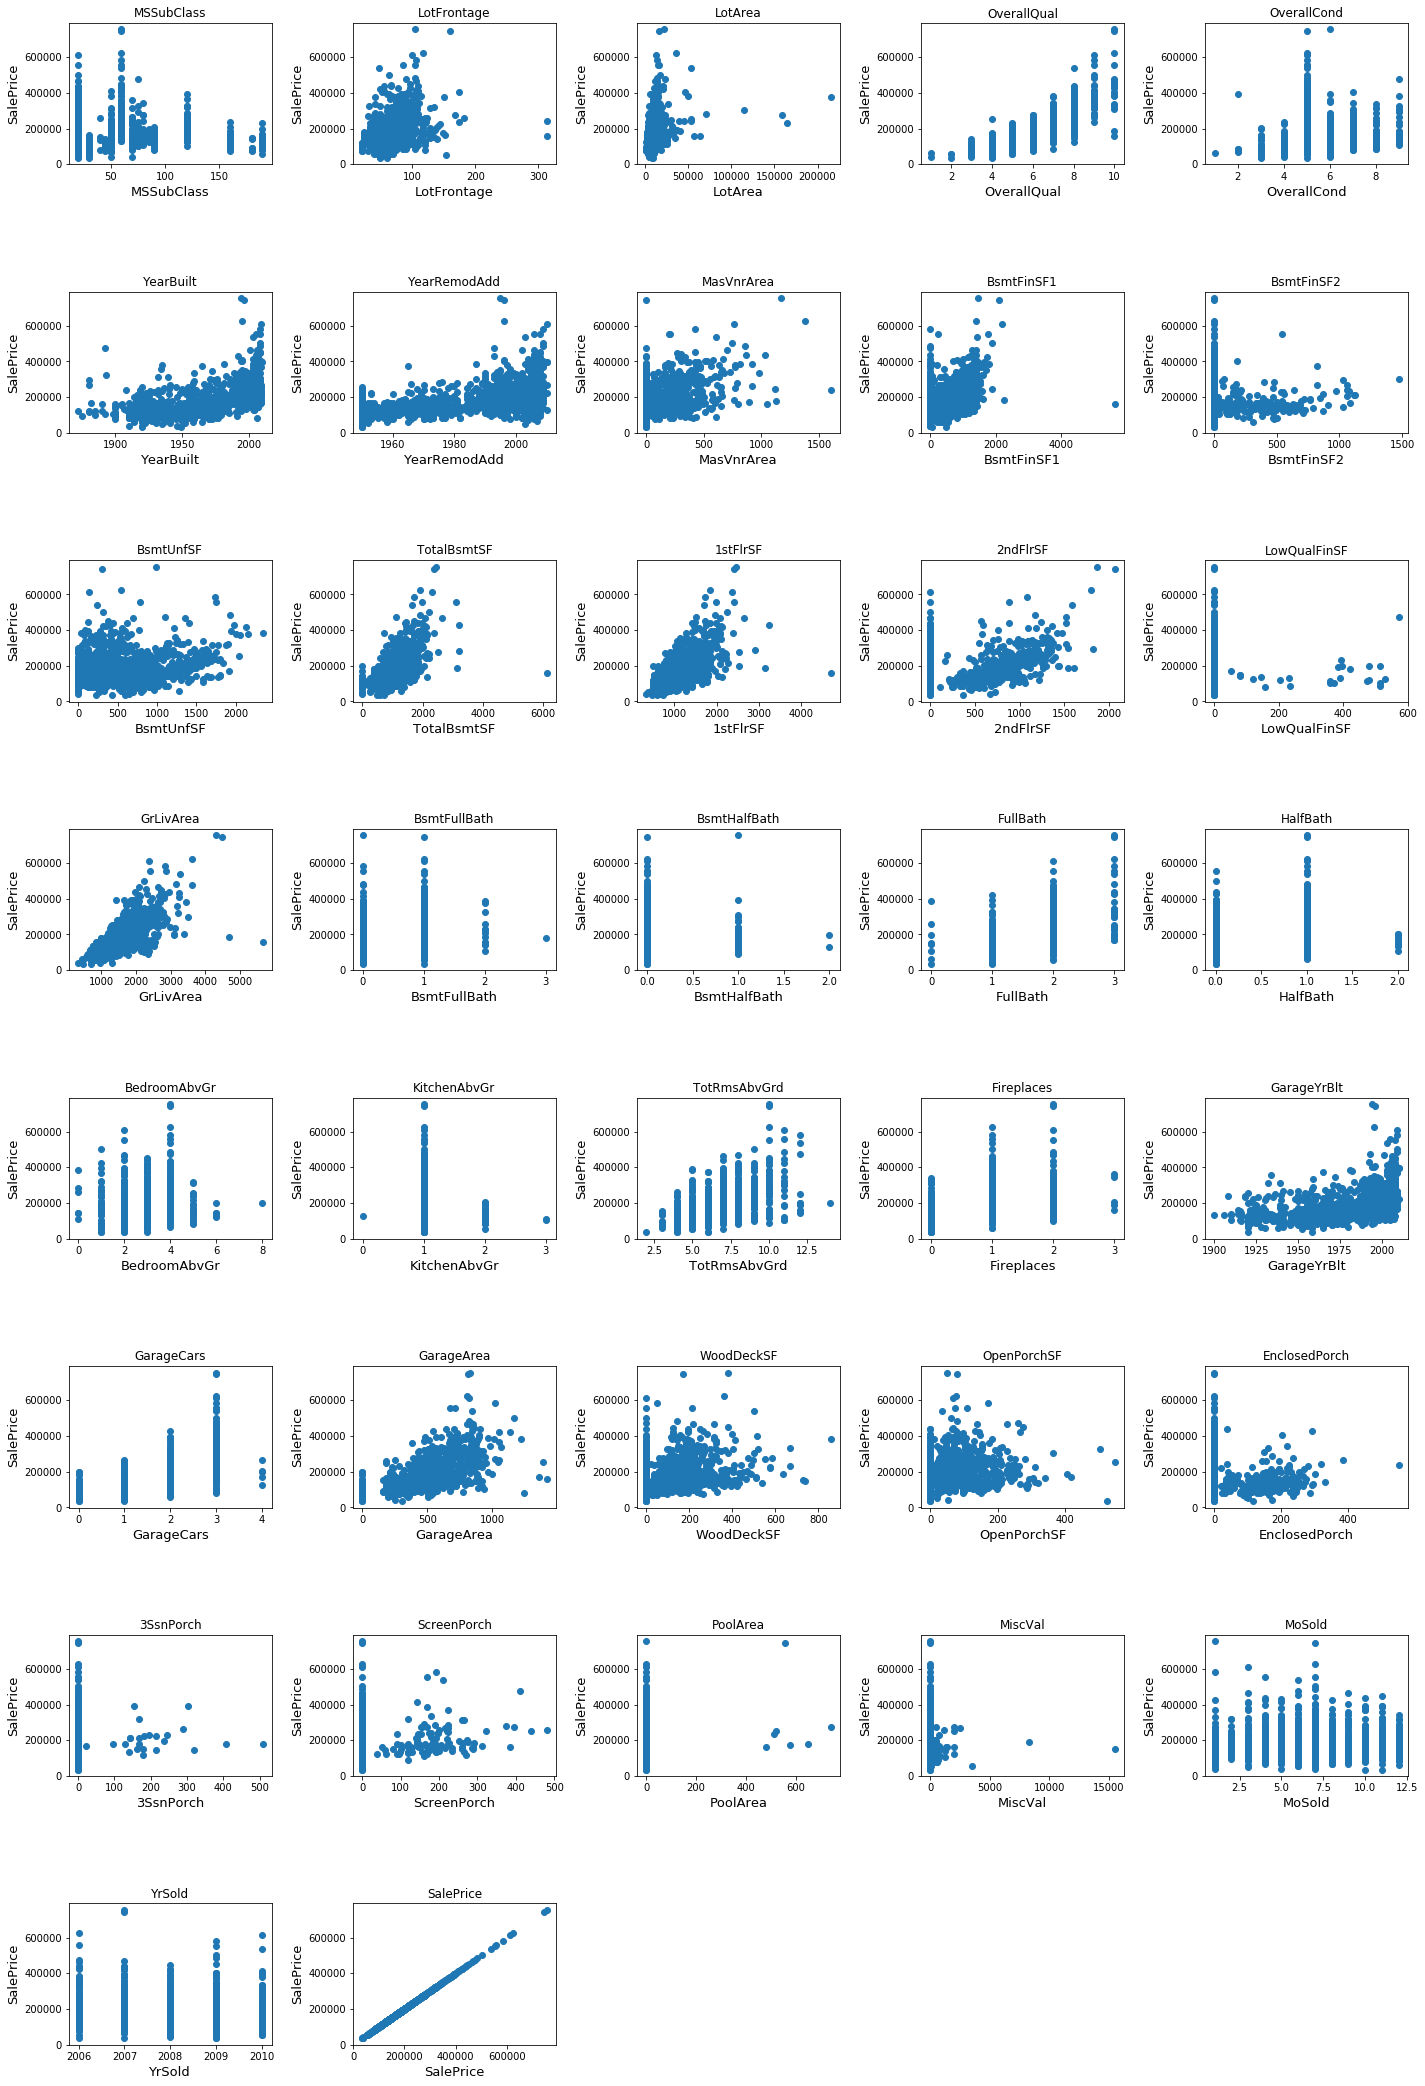

In [297]:
fig = plt.figure(figsize=(24, 36))
count = 1
for x in data[data.columns[data.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.scatter(y=data['SalePrice'], x=data[x])
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel('SalePrice', fontsize=13)
    ax.set_title(x)
    count += 1
plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

In [4]:
# data.drop(data[data['LotFrontage'] > 300].index, inplace=True)
# data.drop(data[data['LotArea'] > 100000].index, inplace=True)
# data.drop(data[data['MasVnrArea'] > 1500].index, inplace=True)
data.drop(data[(data['GrLivArea'] > 4000) & (data['SalePrice']<300000)].index, inplace=True)
# data.drop(data[data['BsmtFullBath'] == 3].index, inplace=True)
# data.drop(data[data['EnclosedPorch'] > 400].index, inplace=True)
# data.drop(data[data['PoolArea'] > 200].index, inplace=True)
# data.drop(data[data['MiscVal'] > 5000].index, inplace=True)
# fig = plt.figure(figsize=(24, 36))
# count = 1
# for x in data[data.columns[data.dtypes != 'object']]:
#     ax = fig.add_subplot(8,5, count)
#     ax.scatter(y=data['SalePrice'], x=data[x])
#     ax.set_xlabel(x, fontsize=13)
#     ax.set_ylabel('SalePrice', fontsize=13)
#     ax.set_title(x)
#     count += 1
# plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

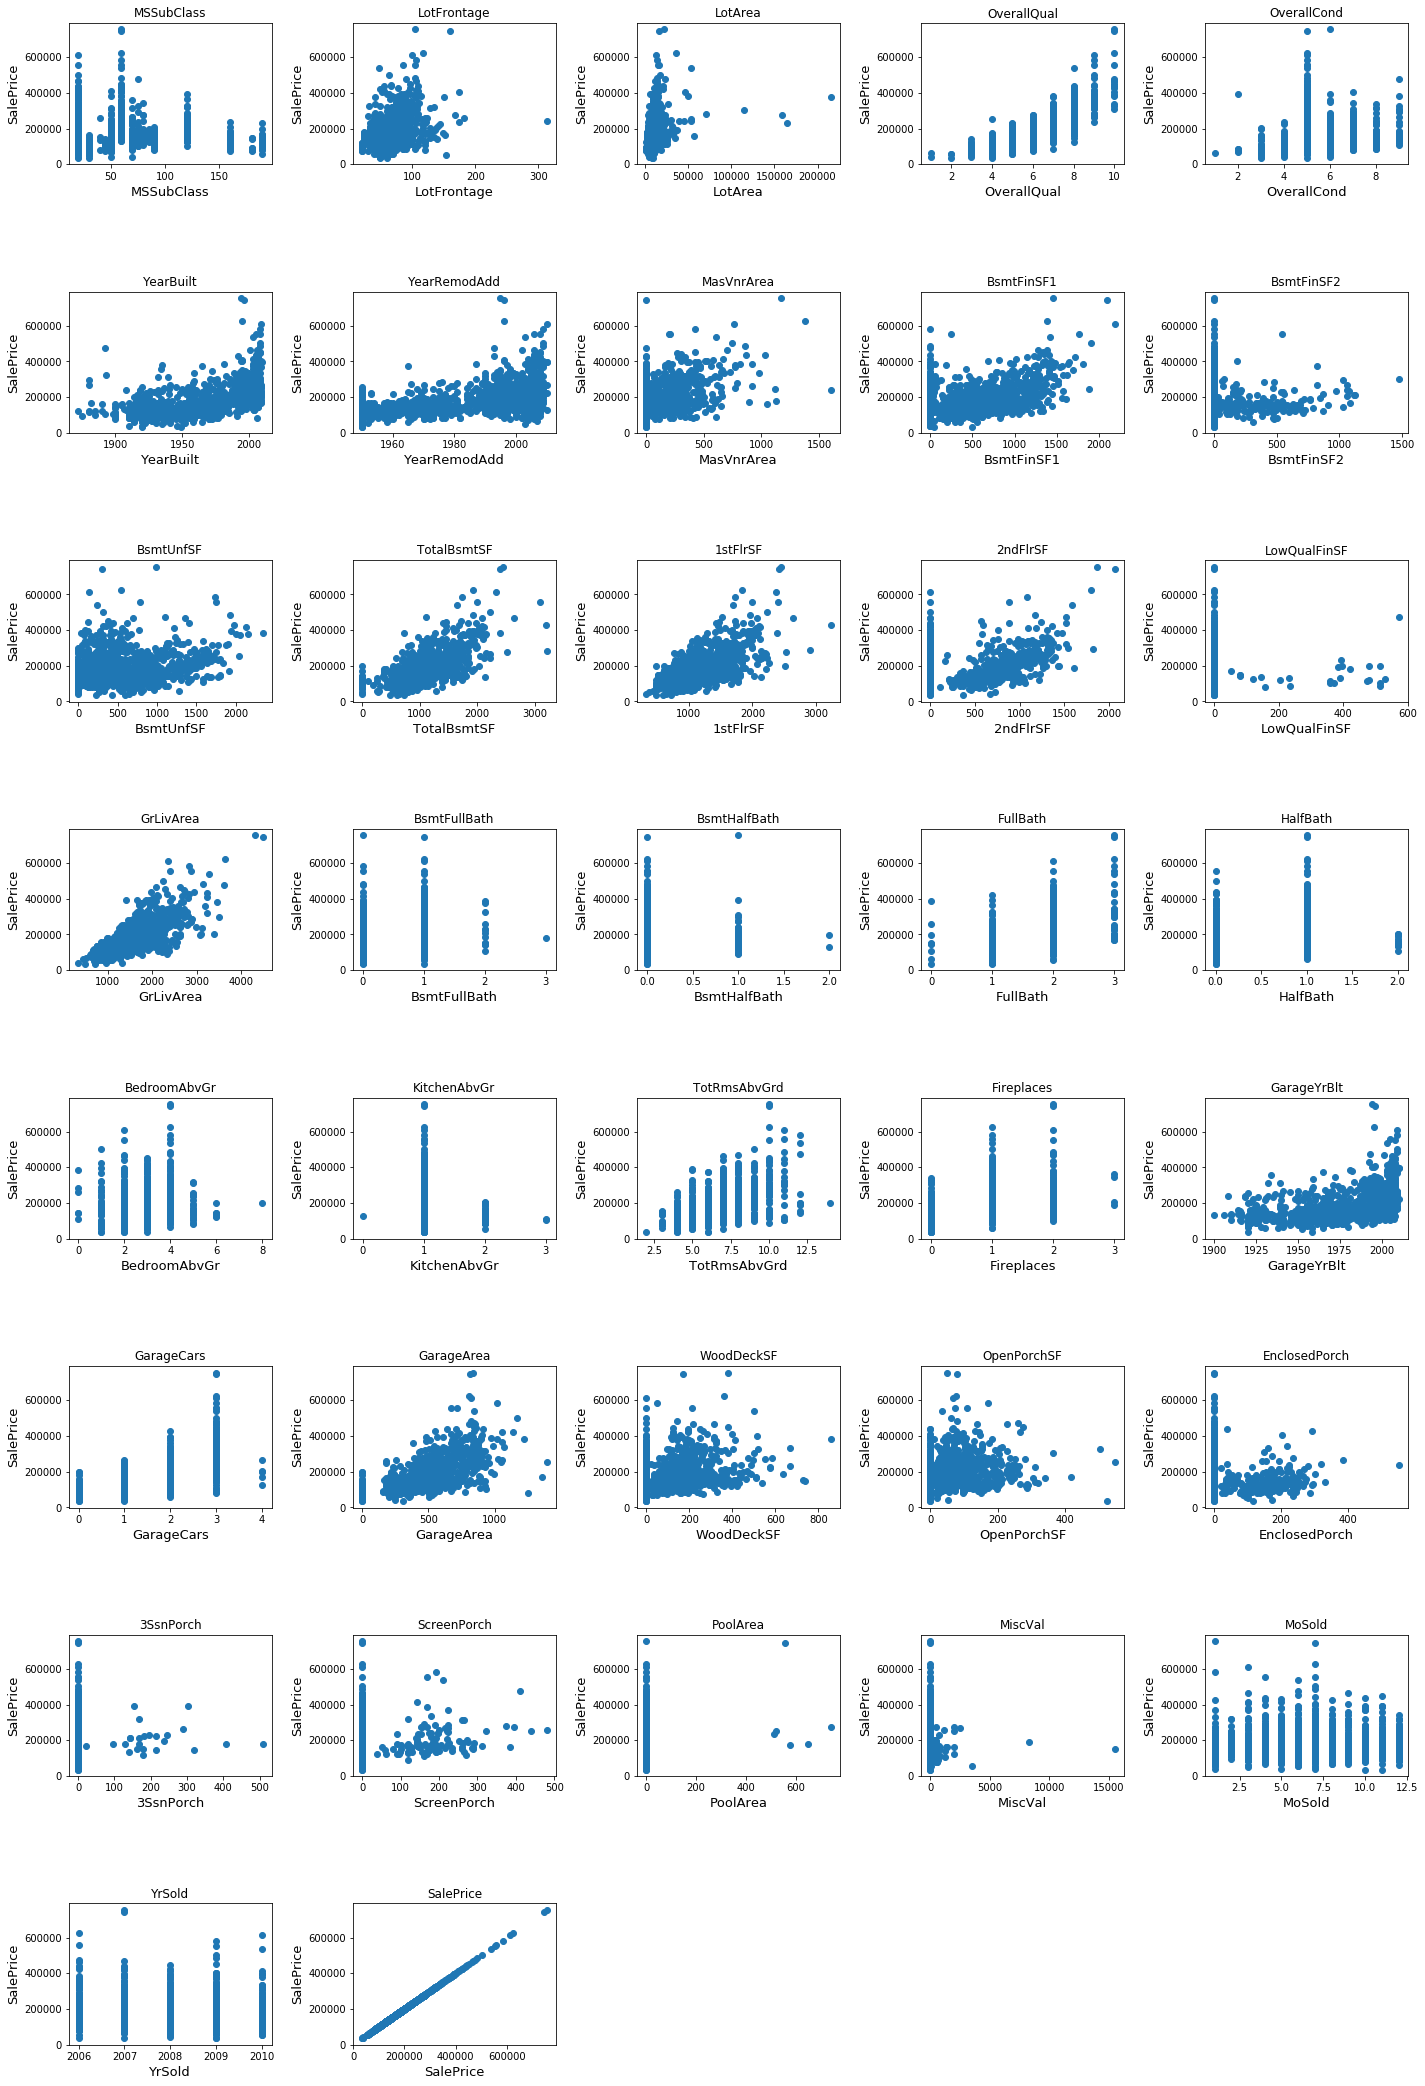

In [299]:
fig = plt.figure(figsize=(24, 36))
count = 1
for x in data[data.columns[data.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.scatter(y=data['SalePrice'], x=data[x])
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel('SalePrice', fontsize=13)
    ax.set_title(x)
    count += 1
plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

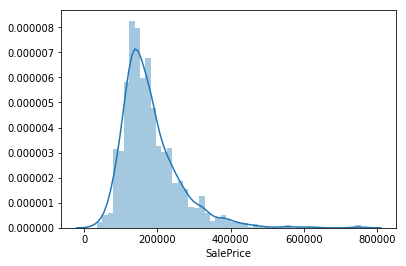

In [300]:
#查看售价分布
sbn.distplot(data['SalePrice'])

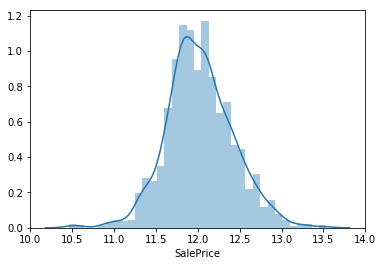

In [301]:
sbn.distplot(np.log1p(data['SalePrice']))

In [6]:
x_train, y_train = data.loc[:,:'SaleCondition'], np.log1p(data['SalePrice']).get_values()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 79 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-

### 数值型数据

In [303]:
x_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1458.000000  1199.000000    1458.000000  1458.000000  1458.000000   
mean     56.893004    69.797331   10459.936900     6.093964     5.576132   
std      42.329437    23.203458    9859.198156     1.376369     1.113359   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7544.500000     5.000000     5.000000   
50%      50.000000    69.000000    9475.000000     6.000000     5.000000   
75%      70.000000    80.000000   11600.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1458.000000   1458.000000  1450.000000  1458.000000  1458.000000   
mean   1971.218107   1984.834019   102.753793   438.827160    46.613169   
std      30.193754     20.641760   179.442156   432.969094   161.420729   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1972.500000   1994.000000     0.000000   382.000000     0.000000   
75%    2000.000000   2004.000000   164.750000   711.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  2188.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1458.000000  1458.000000   1458.000000   
mean    567.096708  1052.537037  1158.851166   345.762003      5.852538   
std     442.087187   414.982320   372.039498   435.423924     48.655960   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.250000   882.000000     0.000000      0.000000   
50%     477.500000   991.000000  1086.000000     0.000000      0.000000   
75%     808.000000  1296.750000  1390.750000   728.000000      0.000000   
max    2336.000000  3206.000000  3228.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath    HalfBath  \
count  1458.000000   1458.000000   1458.000000  1458.000000  1458.00000   
mean   1510.465706      0.423868      0.057613     1.563786     0.38203   
std     507.878508      0.517404      0.238907     0.549891     0.50271   
min     334.000000      0.000000      0.000000     0.000000     0.00000   
25%    1128.500000      0.000000      0.000000     1.000000     0.00000   
50%    1461.500000      0.000000      0.000000     2.000000     0.00000   
75%    1776.000000      1.000000      0.000000     2.000000     1.00000   
max    4476.000000      3.000000      2.000000     3.000000     2.00000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1458.000000   1458.000000   1458.000000  1458.000000  1377.000000   
mean       2.866255      1.046639      6.510974     0.611111  1978.464052   
std        0.816323      0.220483      1.615880     0.641988    24.682879   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1458.000000  1458.000000    1458.000000   
mean      1.766118   472.050069    94.084362    46.245542      21.984225   
std       0.747104   212.239248   125.350021    65.312932      61.155666   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   331.500000     0.000000     0.000000       0.000000   
50%       2.000000   479.500000     0.000000    24.500000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


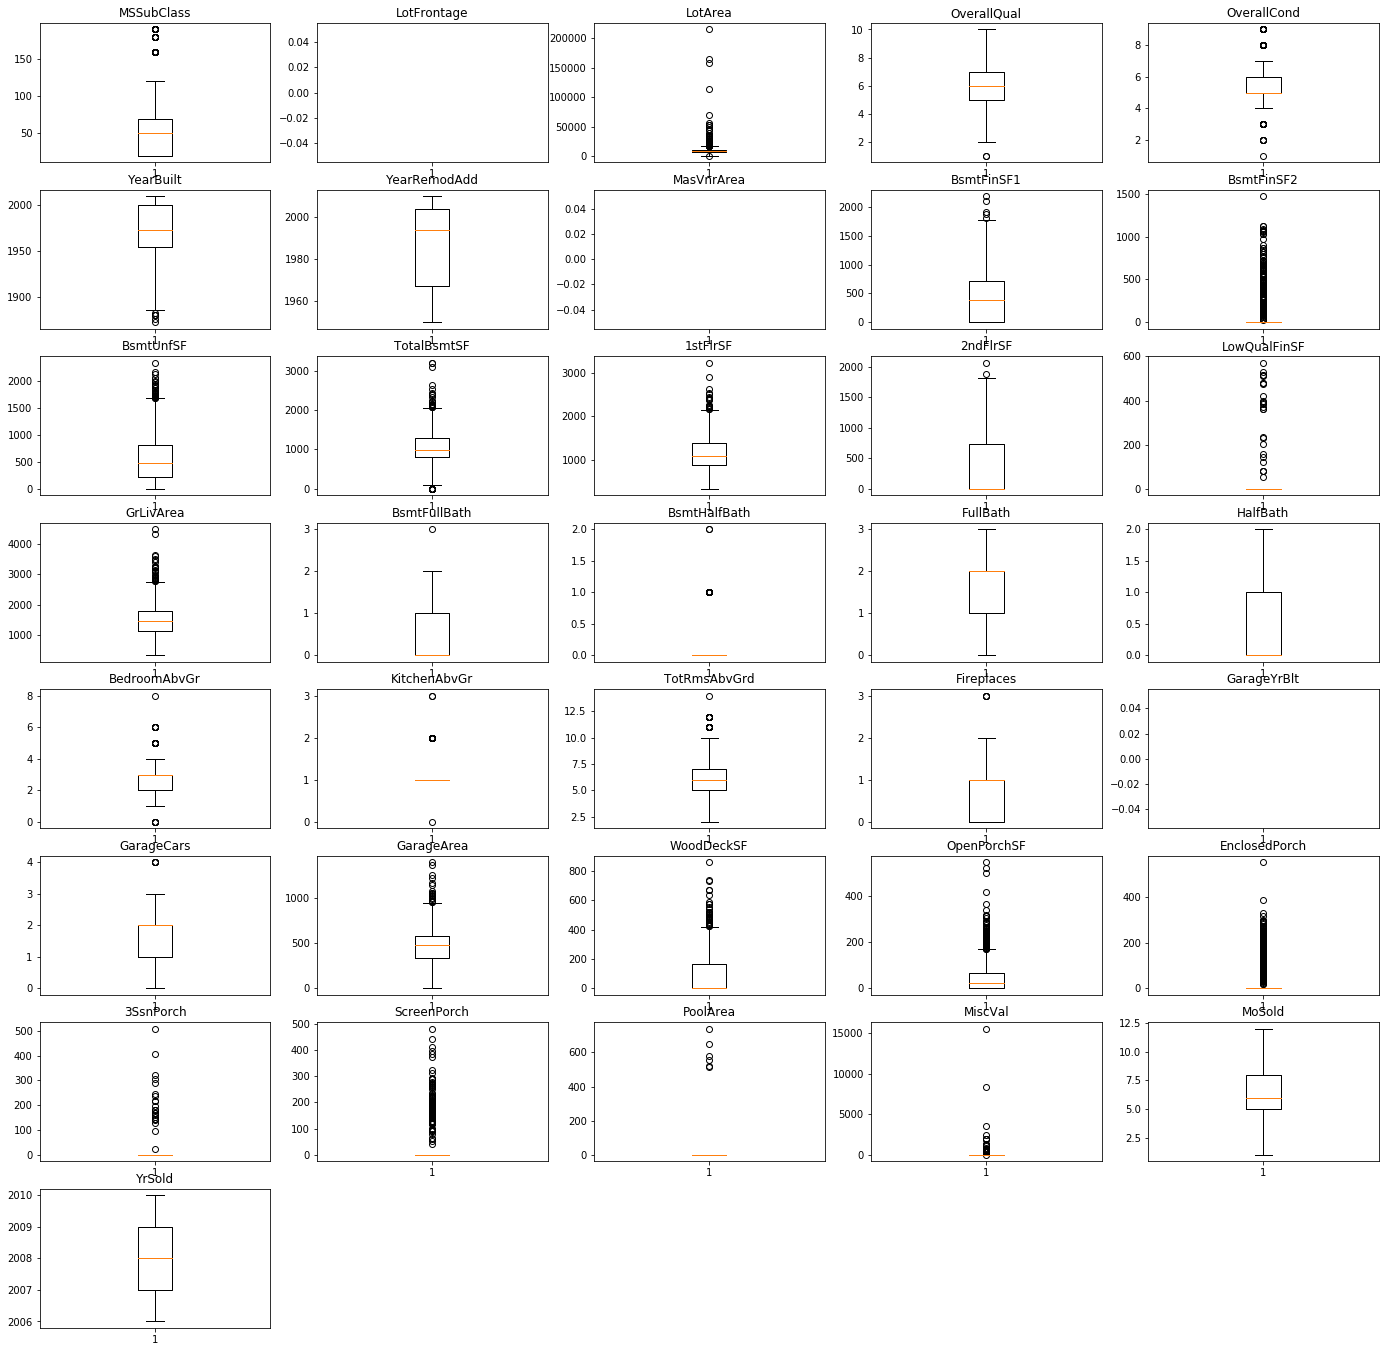

In [304]:
fig = plt.figure(figsize=(24, 24))
count = 1
for x in x_train[x_train.columns[x_train.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.boxplot(x_train[x])
    ax.set_title(x)
    count += 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139983f28>,
      dtype=object)

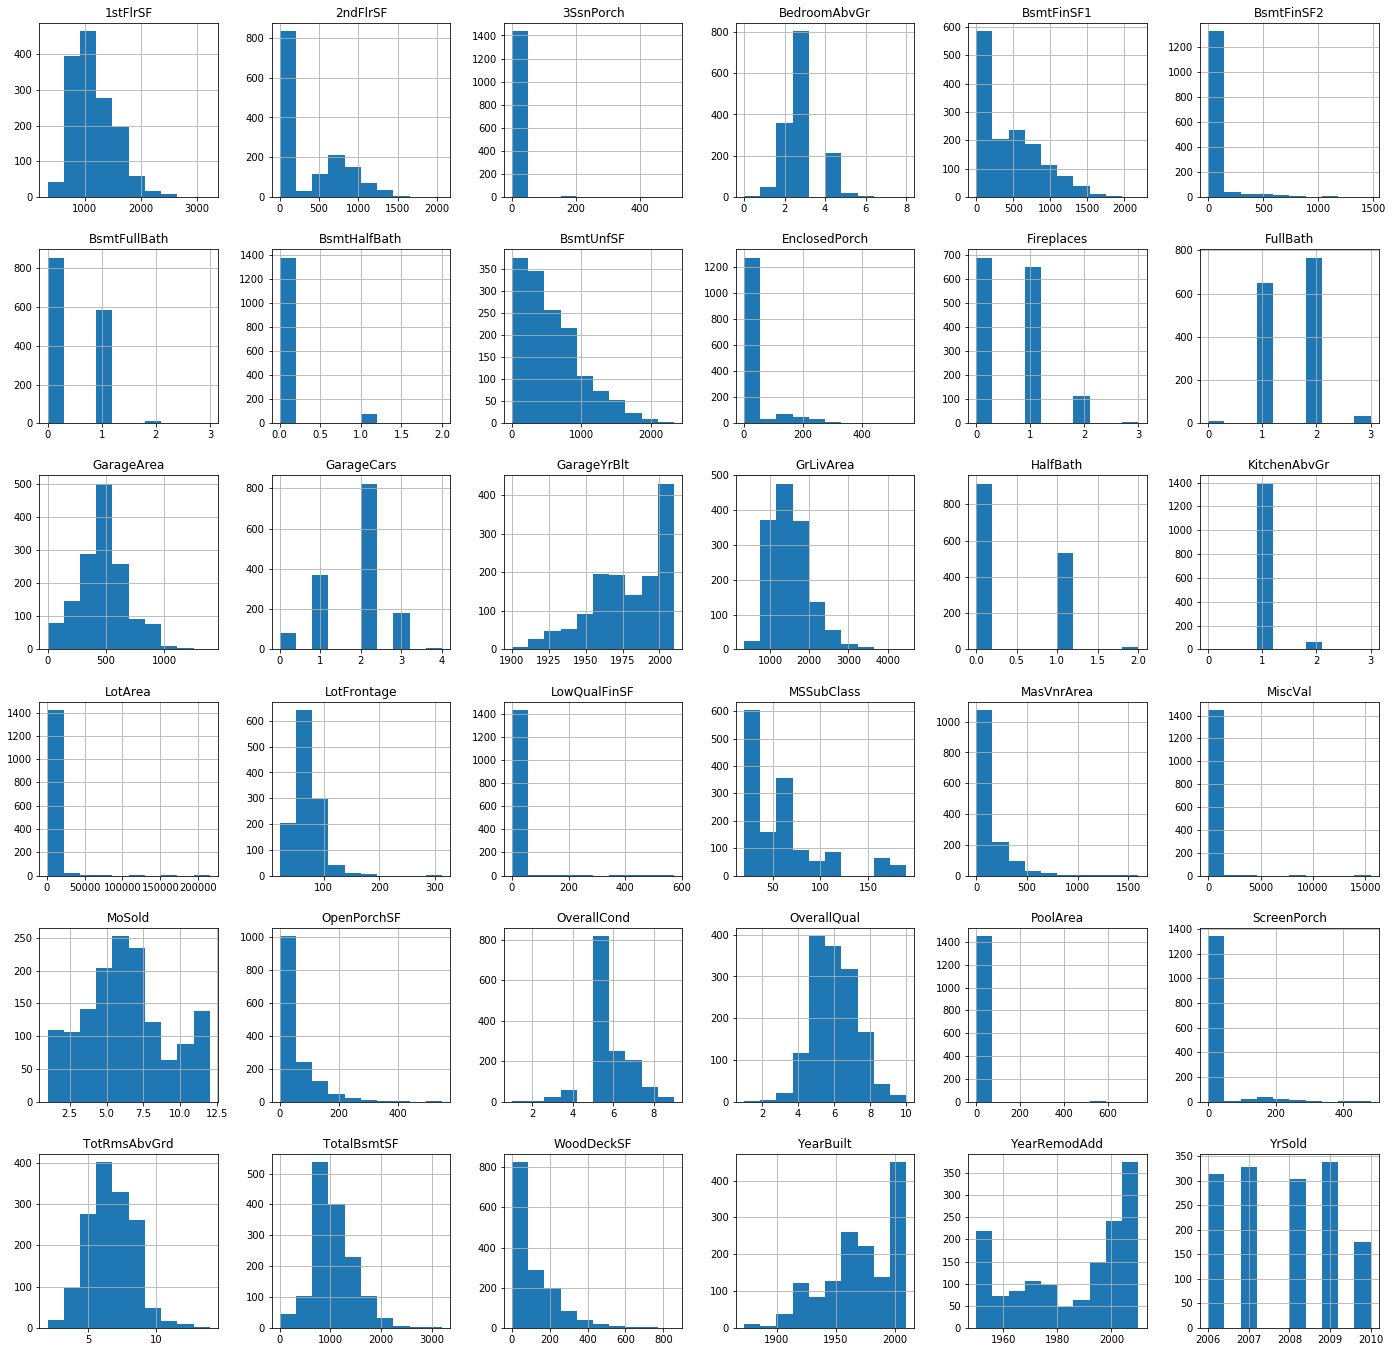

In [305]:
x_train.hist(figsize=(24, 24))

通过对数值型数据的各项指标的描述和直方图可以得出数据分布看出部分数据缺失，如`MSSubClass`、`LotFrontage`等，而大多数数据存在偏斜分布， 如`2ndFlrSF`、`3SsnPorch`等，对于缺失的数据，可以使用中位数进行填充，对于数据分布偏斜的问题，可以通过数据规范化进行调整

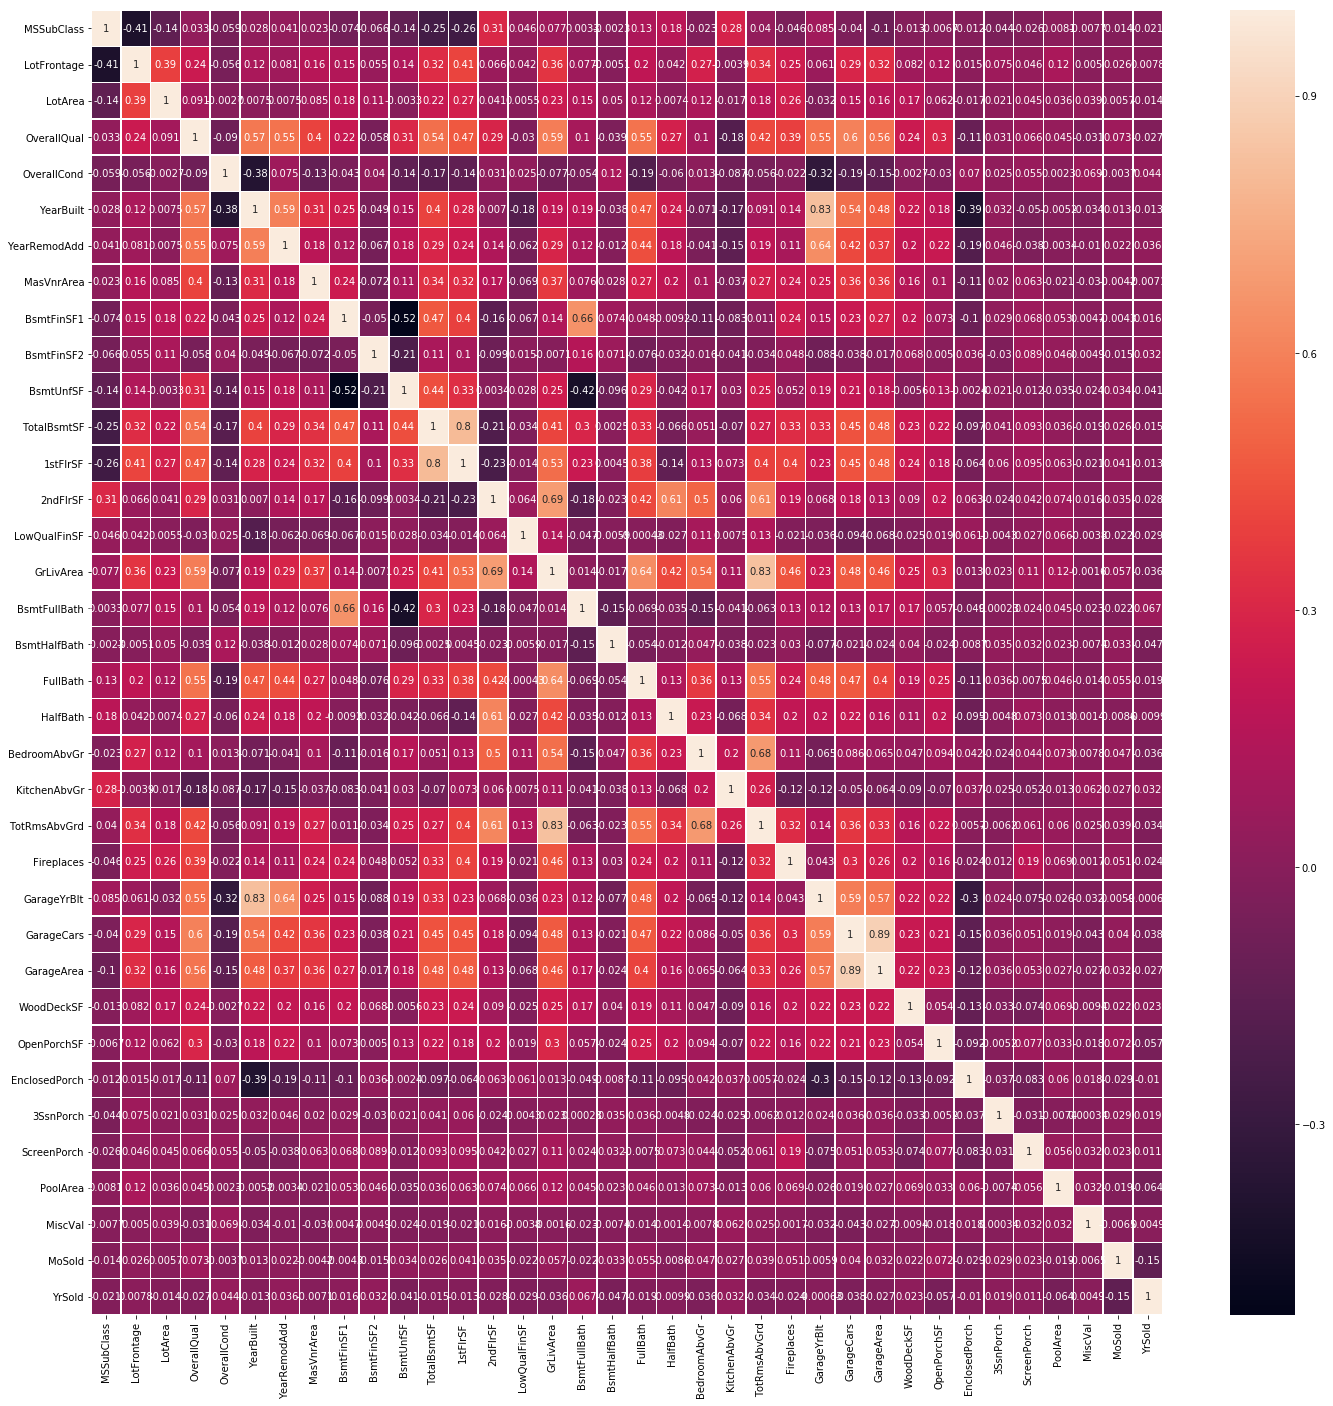

In [306]:
plt.figure(figsize=(24, 24))
sbn.heatmap(x_train.corr(), linewidths=0.5, annot=True)

通过相关性矩阵可以看出`YearBuilt`和`GarageYrBlt`、`TotRmsAbvGrd`和`GrLiveArea`、`1stFlrSF`和`TotalBsmtSF`、`GarageCars`和`GarageArea`具有很高的相关性

### 非数值型数据
数值型数据无论是填充缺失值还是做规整化都是比较容易的，但非数值型数据的分析就稍显复杂了，首先是要确定非数值型数据的取值，然后是明晰每个取值的分布情况，即数量关系

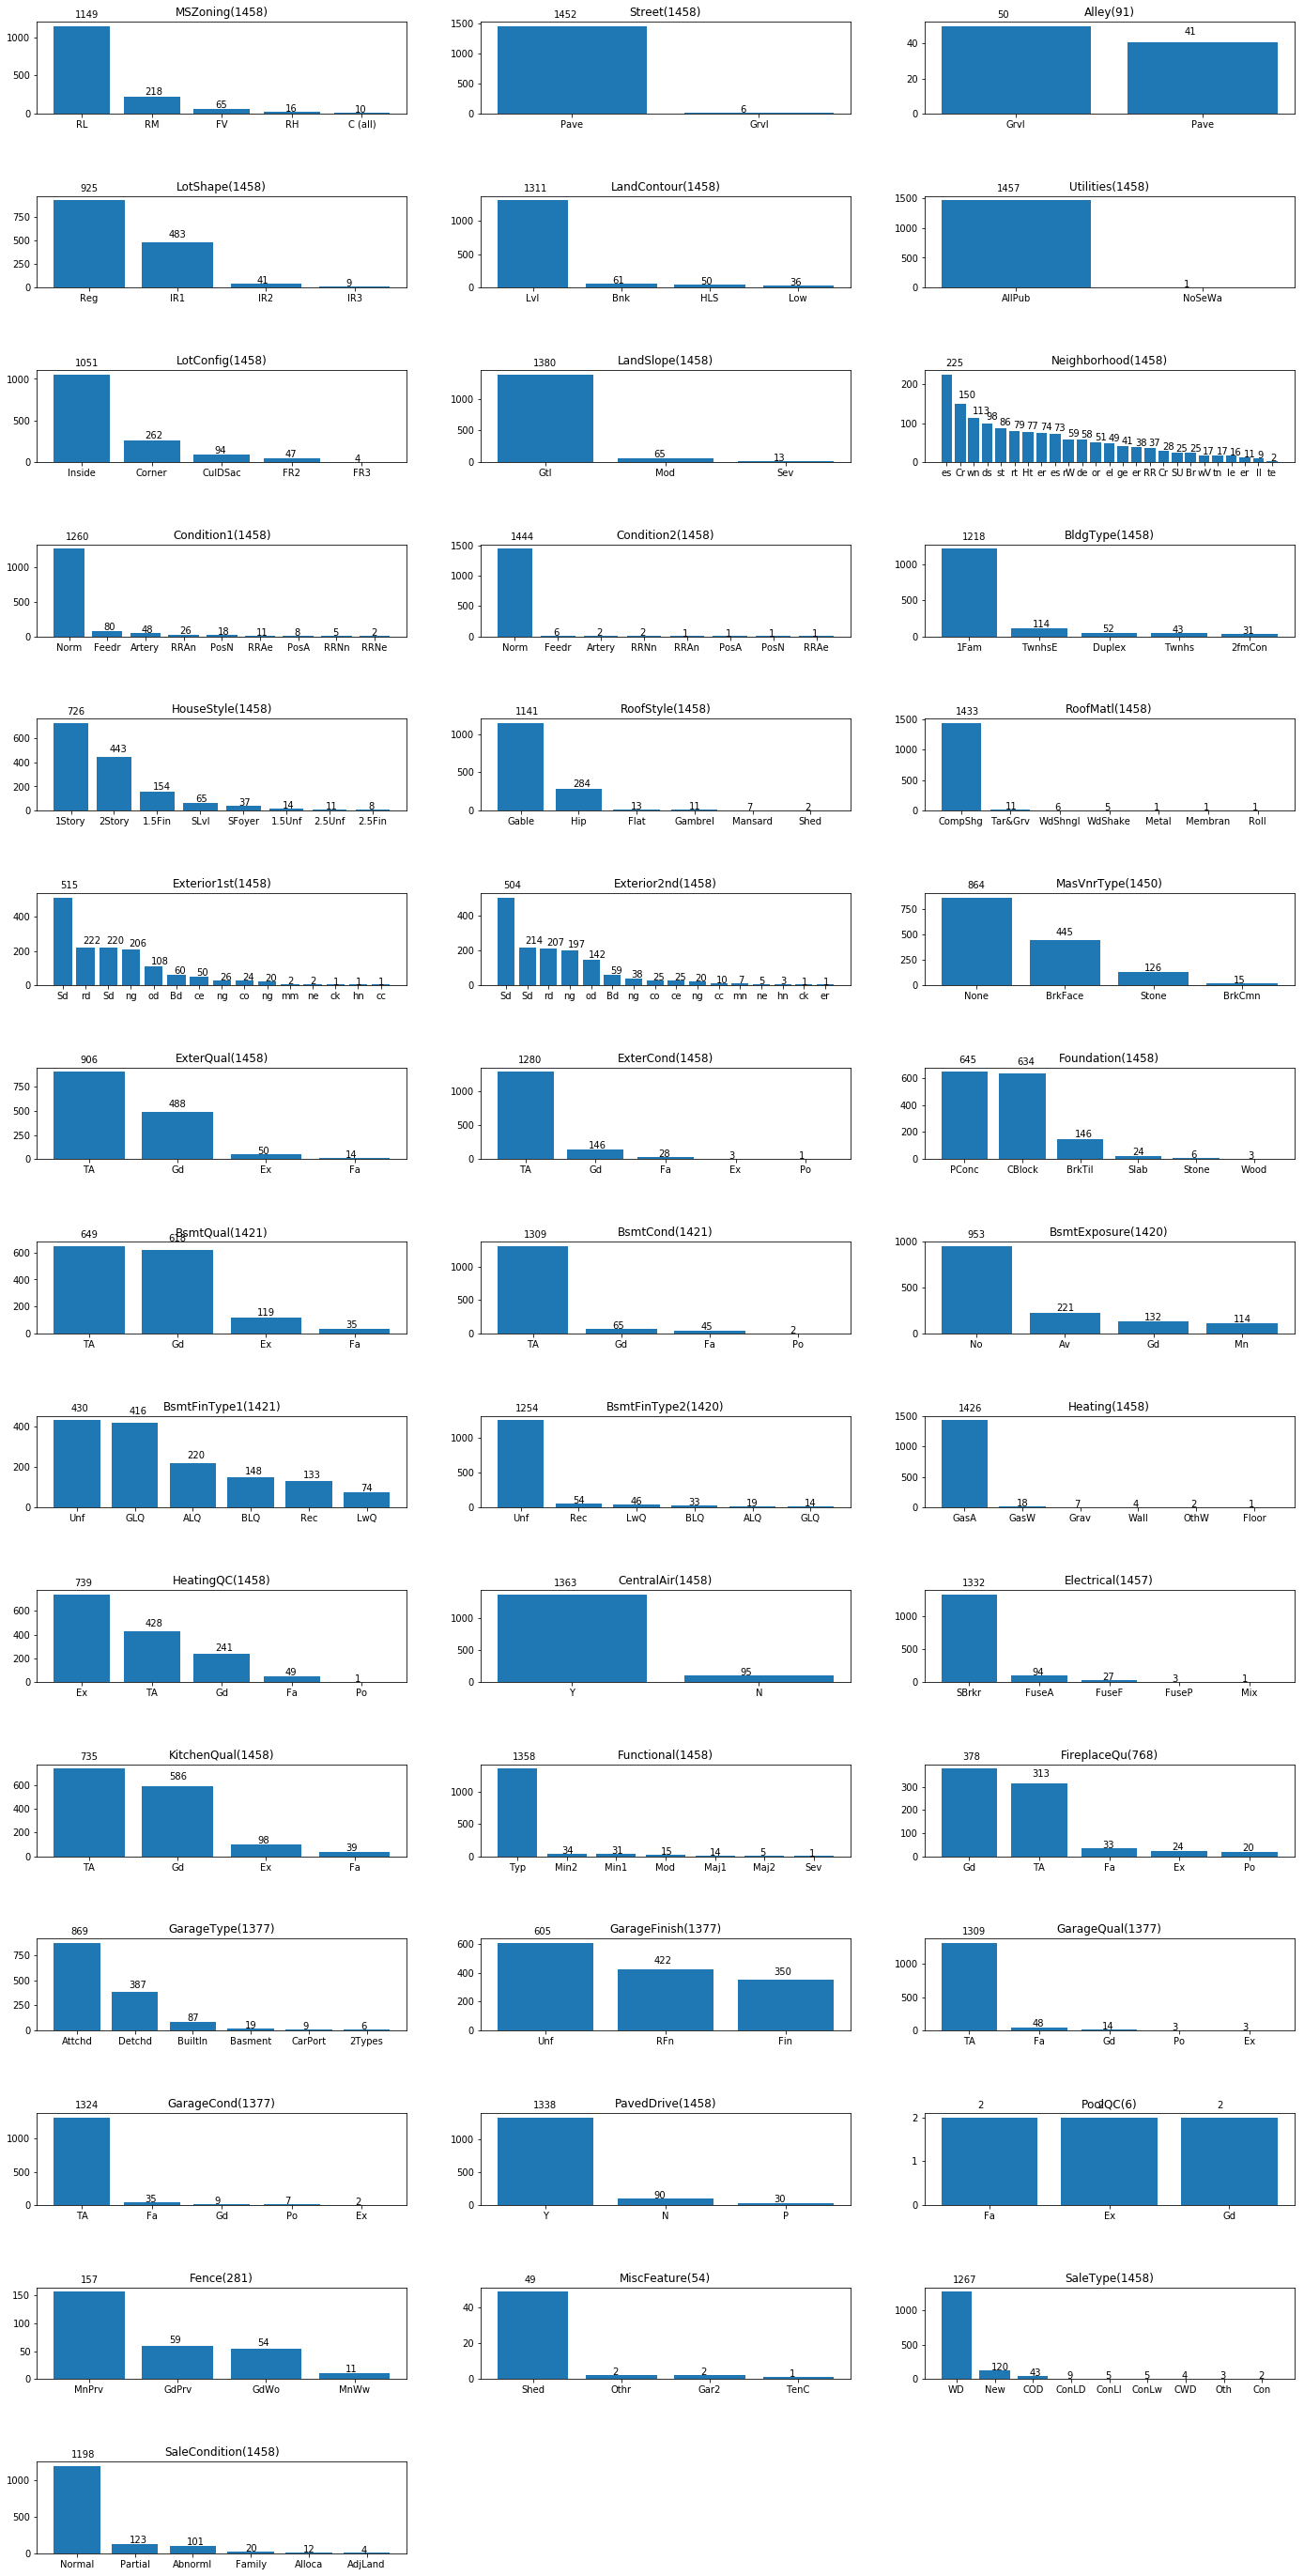

In [307]:
fig = plt.figure(figsize=(24, 48))
count = 1
for x in x_train.columns[x_train.dtypes == 'object']:
    ax = fig.add_subplot(15, 3, count)
    temp_feature = x_train[x].value_counts()
    feature_bar = ax.bar(range(temp_feature.shape[0]), temp_feature.values,  align='center')
    ax.set_xticks(np.arange(temp_feature.shape[0]))
    if temp_feature.shape[0] > 10:
        indexs = [index[-2:] for index in temp_feature.index]
        ax.set_xticklabels(indexs)
    else:
        ax.set_xticklabels(temp_feature.index)
    for bar in feature_bar:
        height = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2-0.1, 1.1*height, str(height))
#     ax.set_ylim(0, 1.2 * temp_feature.values[0])
    ax.set_title(x+'('+str(np.sum(temp_feature))+')')
    count+=1
    
plt.subplots_adjust(hspace=0.9, bottom=0.1)

    

通过柱状图可以观测出每个特征的具体数量以及特征中对应类别值的对应分布，从数据的描述中可以得到部分数据为`NA`的表示不具备相关特征，所以使用`None`填充，其它有缺失数据的特征可以使用当前特征中数量最多的类别进行填充；其中`Utilities`中共有1457条相同数据，1条相异数据，对模型并没有多少帮助，因此可以删去这个特征

## 处理数据
在这个阶段，结合以上对数据的观察与分析，着手对数据的预处理，包括填充空值，处理类别数据，筛选特征等

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import learning_curve
class FeaturePreProcessing(BaseEstimator, TransformerMixin):
    """预处理所有特征"""
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['MSSubClass'] = X['MSSubClass'].astype('str')
        X['YrSold'] = X['YrSold'].astype('str')
        X['MoSold'] = X['MoSold'].astype('str')
        X['OverallQual'] = X['OverallQual'].astype('str')
        X['OverallCond'] = X['OverallCond'].astype('str')
        X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        return X

class FeatureSelect(BaseEstimator, TransformerMixin):
    """特征选取"""
    def __init__(self, obj=True):
        self.obj = obj
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[X.columns[X.dtypes == 'object']] if self.obj else X[X.columns[X.dtypes != 'object']]
    
class NumericalImputer(BaseEstimator, TransformerMixin):
    """数值型特征填充空值"""
    def fit(self, X, y=None):
        self.attributes = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                           'Fireplaces', 
                           'MasVnrArea',
                           'GarageCars', 'GarageArea', 'GarageYrBlt']
        return self
    def transform(self, X, y=None):
        for attribute in self.attributes:
            X[attribute].fillna(0.0, inplace=True)
        # 添加总面积特征
        X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        return X

class StringImputer(BaseEstimator, TransformerMixin):
    """填充String类型的空值"""
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                        index=X.columns)
        return self
    
    def transform(self, X, y=None):
        """
        Alley: Type of alley access to property
           Grvl Gravel
           Pave Paved
           NA  No alley access
        """
        X['Alley'].fillna('None', inplace=True)
        """
        MasVnrType: Masonry veneer type
           BrkCmn   Brick Common
           BrkFace  Brick Face
           CBlock   Cinder Block
           None None
           Stone    Stone
        """
        X['MasVnrType'].fillna('None', inplace=True)
        """
        BsmtCond: Evaluates the general condition of the basement
           Ex   Excellent
           Gd   Good
           TA   Typical - slight dampness allowed
           Fa   Fair - dampness or some cracking or settling
           Po   Poor - Severe cracking, settling, or wetness
           NA   No Basement
        """
        X['BsmtCond'].fillna('None', inplace=True)
        """
        BsmtExposure: Refers to walkout or garden level walls
           Gd   Good Exposure
           Av   Average Exposure (split levels or foyers typically score average or above)  
           Mn   Mimimum Exposure
           No   No Exposure
           NA   No Basement
        """
        X['BsmtExposure'].fillna('None', inplace=True)
        """
        BsmtFinType1: Rating of basement finished area
           GLQ  Good Living Quarters
           ALQ  Average Living Quarters
           BLQ  Below Average Living Quarters   
           Rec  Average Rec Room
           LwQ  Low Quality
           Unf  Unfinshed
           NA   No Basement
        """
        X['BsmtFinType1'].fillna('None', inplace=True)
        """
        BsmtFinType2: Rating of basement finished area (if multiple types)
           GLQ  Good Living Quarters
           ALQ  Average Living Quarters
           BLQ  Below Average Living Quarters   
           Rec  Average Rec Room
           LwQ  Low Quality
           Unf  Unfinshed
           NA   No Basement
        """
        X['BsmtFinType2'].fillna('None', inplace=True)
        """
        FireplaceQu: Fireplace quality
           Ex   Excellent - Exceptional Masonry Fireplace
           Gd   Good - Masonry Fireplace in main level
           TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
           Fa   Fair - Prefabricated Fireplace in basement
           Po   Poor - Ben Franklin Stove
           NA   No Fireplace
        """
        X['FireplaceQu'].fillna('None', inplace=True)
        """
        GarageType: Garage location
           2Types   More than one type of garage
           Attchd   Attached to home
           Basment  Basement Garage
           BuiltIn  Built-In (Garage part of house - typically has room above garage)
           CarPort  Car Port
           Detchd   Detached from home
           NA   No Garage
        """
        X['GarageType'].fillna('None', inplace=True)
        """
        GarageFinish: Interior finish of the garage
           Fin  Finished
           RFn  Rough Finished  
           Unf  Unfinished
           NA   No Garage
        """
        X['GarageFinish'].fillna('None', inplace=True)
        """
        GarageQual: Garage quality
           Ex   Excellent
           Gd   Good
           TA   Typical/Average
           Fa   Fair
           Po   Poor
           NA   No Garage
        """
        X['GarageQual'].fillna('None', inplace=True)
        """
        GarageCond: Garage condition
           Ex   Excellent
           Gd   Good
           TA   Typical/Average
           Fa   Fair
           Po   Poor
           NA   No Garage
        """
        X['GarageCond'].fillna('None', inplace=True)
#         X['GarageYrBlt'].fillna('None', inplace=True)
        """  
        PoolQC: Pool quality
           Ex Excellent
           Gd Good
           TA Average/Typical
           Fa Fair
           NA No Pool
        """
        X['PoolQC'].fillna('None', inplace=True)
        """
        Fence: Fence quality
           GdPrv  Good Privacy
           MnPrv  Minimum Privacy
           GdWo  Good Wood
           MnWw Minimum Wood/Wire
           NA No Fence
        """
        X['Fence'].fillna('None', inplace=True)
        """
        MiscFeature: Miscellaneous feature not covered in other categories
           Elev Elevator
           Gar2 2nd Garage (if not described in garage section)
           Othr Other
           Shed Shed (over 100 SF)
           TenC Tennis Court
           NA None
        """
        X['MiscFeature'].fillna('None', inplace=True)
        return X.fillna(self.most_frequent_)
    
class DropFeature(BaseEstimator, TransformerMixin):
    """删除部分特征"""
    def __init__(self, features):
        self.features = features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.features, axis=1)

class RemoveOutlier(BaseEstimator, TransformerMixin):
    """处理异常值"""
    def fit(self, X, y=None):
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.upper = q3 + 1.5 * iqr
        self.down = q1 - 1.5 * iqr
        self.median = X.median()
        return self
        
    def transform(self, X, y=None):
        X.where(X <= self.upper, self.upper, axis=1, inplace=True)
        X.where(X >= self.down, self.down, axis=1, inplace=True)
#         X['MiscVal'].where(X['MiscVal'] <= 5000, 5000, inplace=True)
#         X['LotFrontage'].where(X['LotFrontage'] <= 300, 300, inplace=True)
#         X['LotArea'].where(X['LotArea'] <= 100000, 100000, inplace=True )
#         X['MasVnrArea'].where(X['MasVnrArea'] <= 1500, 1500, inplace=True)
#         X['GrLivArea'].where(X['GrLivArea'] <= 4000, 4000, inplace=True)
#         X['EnclosedPorch'].where(X['EnclosedPorch'] <= 400, 400, inplace=True)
#         X['MiscVal'].where(X['MiscVal'] <= 5000, 5000, inplace=True)
        return X
    
def plot_learning_curve(model, X, y):
    train_size, train_scores, test_scores = learning_curve(model, X, y, 
                                                           n_jobs=-1, verbose=True, cv=10, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color='r')
    plt.fill_between(train_size, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1,
                    color='b')
    plt.plot(train_size, train_scores_mean, 'r-', label='train')
    plt.plot(train_size, test_scores_mean, 'b--',label='val')
    plt.ylim(0.5, 1.05)
    plt.yticks( np.linspace(0.5, 1, 11))
    plt.xlabel('Train Size', fontsize=14)
    plt.ylabel('acc', fontsize=14)
    plt.legend(loc='lower right')

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

all_pipeline = Pipeline([
    ('featurePre', FeaturePreProcessing())
])
numeric_pipeline = Pipeline([
#         ('drop', DropFeature(['PoolQC','YearBuilt', 'TotRmsAbvGrd', '1stFlrSF'])),
        ('selector', FeatureSelect(False)),
        ('impute1', NumericalImputer()),
#         ('outlier', RemoveOutlier()),
        ('impute', SimpleImputer(strategy='median')),
        ('standard', StandardScaler())
])

cat_pipeline = Pipeline([
        ('drop', DropFeature([ 'Utilities'])),
        ('selector', FeatureSelect()),
        ('impute', StringImputer()),
        ('oneHot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

full_pipeline = Pipeline([
    ('all_pipeline', all_pipeline),
    ('featureunion',FeatureUnion([
        ('numeric_pipeline', numeric_pipeline),
        ('cat_pipeline', cat_pipeline)]))
])

x_train = full_pipeline.fit_transform(x_train)

# 模型选择
这里将尝试数个模型，比较它们的性能，来选择最优的模型

## 随机梯度下降

In [310]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
# lr_pipline = Pipeline([
#       ('poly', PolynomialFeatures(degree=2)),
#     ('lr', SGDRegressor(alpha=0.001, eta0=0.01,penalty='None', learning_rate='constant'))
# ])
# lr_pipline.fit(x_train, y_train)
# lr_pred = cross_val_predict(lr_pipline, x_train, y_train, 
#                             verbose=True, n_jobs=-1, cv=3)
# lr_mse = mean_squared_error(lr_pred, y_train)
# np.sqrt(lr_mse)
sgd = SGDRegressor(loss='huber', early_stopping=True, max_iter=5000)
sgd_grid_params = {
    'penalty': ['None', 'l1', 'l2', 'elasticnet'],
    'alpha': np.linspace(1e-3, 0.01),
    'l1_ratio': np.linspace(0, 1),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': np.linspace(1e-3, 1),
    'power_t': np.linspace(1e-3, 1),
    'epsilon': np.linspace(1e-3, 1)
}
sgd_rnd_cv = RandomizedSearchCV(sgd, param_distributions=sgd_grid_params, cv=5, 
                                verbose=True, n_jobs=-1)
sgd_rnd_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='huber', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'penalty': ['None', 'l1', 'l2', 'elasticnet'], 'alpha': array([0.001  , 0.00118, 0.00137, 0.00155, 0.00173, 0.00192, 0.0021 ,
       0.00229, 0.00247, 0.00265, 0.00284, 0.00302, 0.0032 , 0.00339,
       0.00357, 0.00376, 0.00394, 0.00412, 0.00431, 0.00449, 0.00467,
       0.0048...51, 0.8369 ,
       0.85729, 0.87767, 0.89806, 0.91845, 0.93884, 0.95922, 0.97961,
       1.     ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
       

In [311]:
sgd_rnd_cv.best_score_

0.8936067571117535

In [312]:
sgd_rnd_cv.best_estimator_

SGDRegressor(alpha=0.0050408163265306125, average=False, early_stopping=True,
       epsilon=0.2864285714285714, eta0=0.5106938775510205,
       fit_intercept=True, l1_ratio=0.3877551020408163,
       learning_rate='optimal', loss='huber', max_iter=5000, n_iter=None,
       n_iter_no_change=5, penalty='elasticnet',
       power_t=0.26604081632653065, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)

In [313]:
sgd_pred = cross_val_predict(sgd_rnd_cv.best_estimator_, x_train, y_train, 
                            verbose=True, n_jobs=-1, cv=3)
sgd_mse = mean_squared_error(sgd_pred, y_train)
np.sqrt(sgd_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.1s finished


0.13076084758562323

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


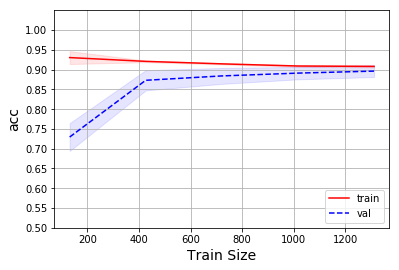

In [314]:
plot_learning_curve(sgd_rnd_cv.best_estimator_, x_train, y_train)
# train_size, train_scores, test_scores = learning_curve(sgd_rnd_cv.best_estimator_, x_train, y_train, 
#                                                        n_jobs=-1, verbose=True, cv=10, random_state=42)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# plt.grid()

# plt.fill_between(train_size, train_scores_mean - train_scores_std,
#                 train_scores_mean + train_scores_std, alpha=0.1,
#                 color='r')
# plt.fill_between(train_size, test_scores_mean - test_scores_std,
#                 test_scores_mean + test_scores_std, alpha=0.1,
#                 color='b')
# plt.plot(train_size, train_scores_mean, 'r-', label='train')
# plt.plot(train_size, test_scores_mean, 'b--',label='val')
# plt.ylim(0, 1.05)
# plt.yticks( np.linspace(0, 1, 11))
# plt.xlabel('Train Size', fontsize=14)
# plt.ylabel('acc', fontsize=14)
# plt.legend(loc='lower right')

### 比对线性回归

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
lr_pipline = Pipeline([
       ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])
lr_pipline.fit(x_train, y_train)
lr_pred = cross_val_predict(lr_pipline, x_train, y_train, 
                            verbose=True, n_jobs=-1, cv=3)
lr_mse = mean_squared_error(lr_pred, y_train)
np.sqrt(lr_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.1s finished


0.14167592407063873

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


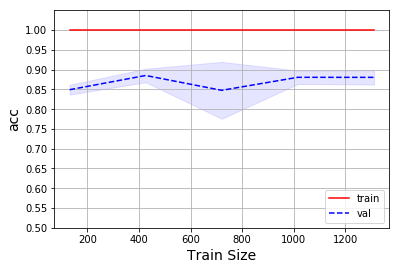

In [316]:
plot_learning_curve(lr_pipline, x_train, y_train)

## 岭回归

In [317]:
from sklearn.kernel_ridge import KernelRidge

ridge = KernelRidge(degree=2, alpha=0.05, kernel='polynomial')
ridge_pred = cross_val_predict(ridge, x_train, y_train, 
                               cv=3, verbose=True, n_jobs=-1)
ridge_mse = mean_squared_error(y_train, ridge_pred)
np.sqrt(ridge_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.11650866851364311

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


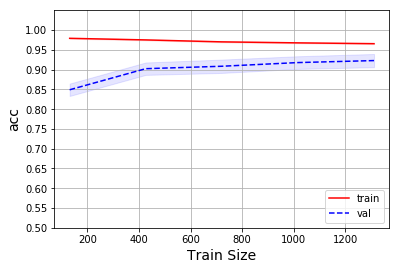

In [318]:
plot_learning_curve(ridge, x_train, y_train)

使用岭回归可以看到训练正确率有所下降，验证正确率有所上升，下面再试试`LASSO`回归

## LASSO回归

In [319]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0005)
lasso_pred = cross_val_predict(lasso, x_train, y_train, 
                               cv=3, verbose=True, n_jobs=-1)
lasso_mse = mean_squared_error(lasso_pred, y_train)
np.sqrt(lasso_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


0.1165640368257087

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


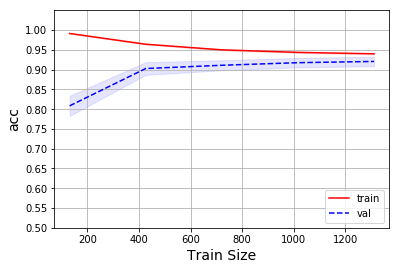

In [320]:
plot_learning_curve(lasso, x_train, y_train)

可以看出`Lasso`的效果并没有岭回归好，可能是因为`Lasso`使用`l1`范数稀疏掉了过多的特征导致其泛化能力的下降

## Elastic Net

In [321]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

en = ElasticNet(max_iter=5000, selection='random')
en_param = {
    'l1_ratio': np.linspace(0.01, 1, 11),
    'alpha': np.linspace(0.0005, 0.1,11)
}
en_grid_cv = GridSearchCV(en, param_grid=en_param, verbose=True, 
                                cv=5, n_jobs=-1)
en_grid_cv.fit(x_train, y_train)
# en = ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
#       l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
#       precompute=False, random_state=None, selection='cyclic', tol=0.0001,
#       warm_start=False)
# en.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 598 out of 605 | elapsed:   17.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:   17.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'l1_ratio': array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
       0.901, 1.   ]), 'alpha': array([0.0005 , 0.01045, 0.0204 , 0.03035, 0.0403 , 0.05025, 0.0602 ,
       0.07015, 0.0801 , 0.09005, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [322]:
en = en_grid_cv.best_estimator_
en_grid_cv.best_estimator_

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=1.0,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [323]:
# en_grid_cv.best_score_

In [324]:
en_pred = cross_val_predict(en, x_train, y_train, 
                            verbose=True, n_jobs=-1, cv=3)
mse = mean_squared_error(y_train, en_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


0.11656605529414989

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


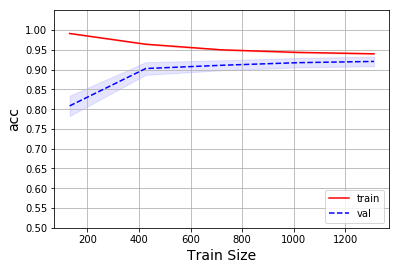

In [325]:
plot_learning_curve(en, x_train, y_train)

### KernelPCA

In [326]:
# from sklearn.decomposition import KernelPCA
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# lr_pipeline = Pipeline([
# #     ('kpca', KernelPCA()),
#     ('lr', LinearRegression())
# ])

# lr_param = {
# #     'kpca__gamma': np.linspace(0.001, 0.03, 10),
# #     'kpca__kernel': ['rbf', 'linear', 'poly'],
#     'lr__normalize': [False, True]
# }

# lr_grid_cv = RandomizedSearchCV(lr_pipeline, param_distributions=lr_param, cv=3, 
#                           verbose=True, n_jobs=-1, iid=True)
# lr_grid_cv.fit(x_train, y_train)

In [327]:
# lr_grid_cv.best_params_

In [328]:
# lr_grid_cv.best_score_

In [329]:
# lr = lr_grid_cv.best_estimator_
# lr_pred = cross_val_predict(lr, x_train, y_train, 
#                             cv=3, verbose=True, n_jobs=-1)
# mse = mean_squared_error(y_train, lr_pred)
# np.sqrt(mse)

In [330]:
# plot_learning_curve(lr, x_train, y_train)

可以明显看到，使用PCA之后训练集的准确率为`1`，这是明显的过拟合现象

# 集成学习

In [331]:
def plot_acc_4_grid(grid_cv, param):
        fig = plt.figure(figsize=(10, 10))
        mean_acc = fig.add_subplot(2,1,1)
        std_acc = fig.add_subplot(2,1,2) 
        # 训练参数个数
        params_num = len(grid_cv.cv_results_['params'])
        x_ticks = np.arange(params_num)
        # 把每一次的参数作为横坐标label
        score_label = [list(grid_cv.cv_results_['params'][i].values())[0] for i in range(params_num)]
        # 平均精确度
        mean_train_score = grid_cv.cv_results_['mean_train_score']
        mean_test_score =  grid_cv.cv_results_['mean_test_score']
        # 方差
        std_train_score = grid_cv.cv_results_['std_train_score']
        std_test_score = grid_cv.cv_results_['std_test_score']
        
        mean_acc.plot(mean_train_score, 'r-o', label='mean_train_score')
        mean_acc.plot(mean_test_score , 'b-o', label='mean_test_score')
        mean_acc.set_title('mean_acc@'+param, fontsize=18)
        mean_acc.set_xticks(x_ticks)
        mean_acc.set_xticklabels(score_label)
        mean_acc.set_xlabel(param, fontsize=18)
        mean_acc.set_ylabel('mean_acc', fontsize=18)
        mean_acc.legend(loc='best', fontsize=18)
        mean_acc.grid()
        
        std_acc.plot(std_train_score,'r-*', label='std_train_score')
        std_acc.plot(std_test_score, 'b-*', label='std_test_score')
        std_acc.set_title('std_acc@'+param, fontsize=18)
        std_acc.set_xticks(x_ticks)
        std_acc.set_xticklabels(score_label)
        std_acc.set_xlabel(param, fontsize=18)
        std_acc.set_ylabel('std_acc', fontsize=18)
        std_acc.legend(loc='best', fontsize=18)
        std_acc.grid()
        
        plt.subplots_adjust(hspace=0.5)

## 随机森林

* n_estimators

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_param = {
    'n_estimators': np.arange(1, 1000, 100),
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=50), param_grid=rf_param,
                         cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

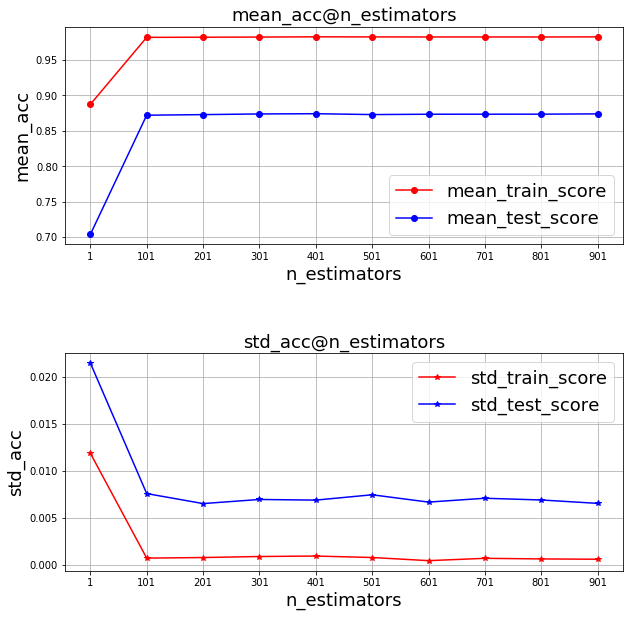

In [333]:
plot_acc_4_grid(rf_grid_cv, 'n_estimators')

In [334]:
rf_param = {
    'n_estimators': np.arange(100, 200, 10),
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=50), param_grid=rf_param,
                         cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

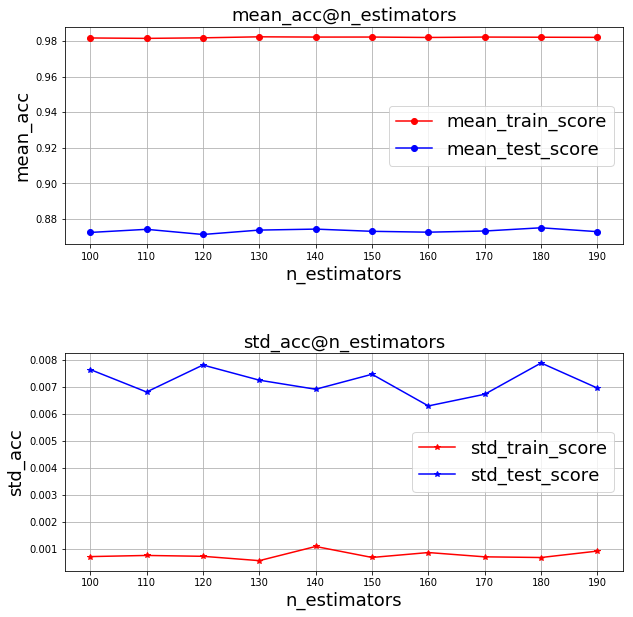

In [335]:
plot_acc_4_grid(rf_grid_cv, 'n_estimators')

* max_depth

In [336]:
rf_param = {
    'max_depth': np.arange(1, 100),
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160), param_grid=rf_param,
                         cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

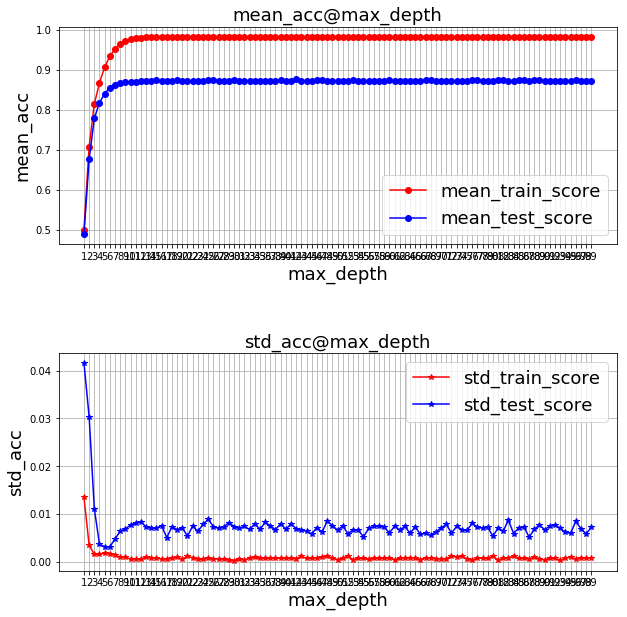

In [337]:
plot_acc_4_grid(rf_grid_cv, 'max_depth')

In [338]:
rf_param = {
    'max_depth': np.arange(1, 20),
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160), param_grid=rf_param,
                         cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   44.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

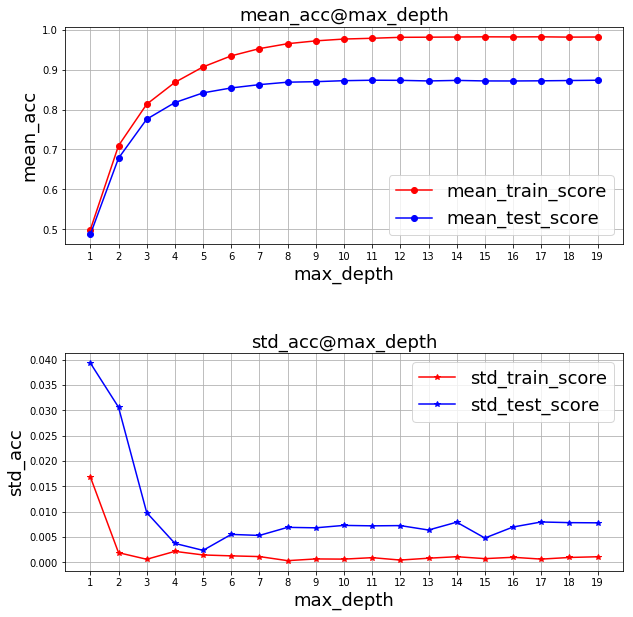

In [339]:
plot_acc_4_grid(rf_grid_cv, 'max_depth')

* max_features

In [340]:
rf_param = {
    'max_features': np.arange(1, 345, 10)
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5), 
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   26.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

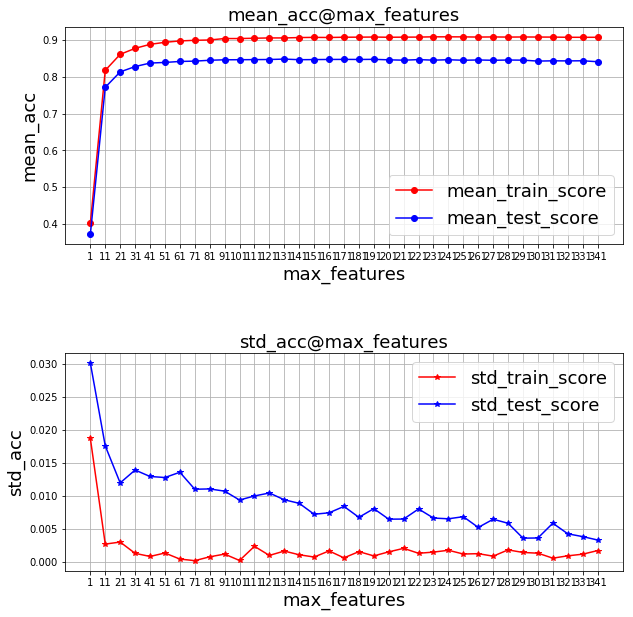

In [341]:
plot_acc_4_grid(rf_grid_cv, 'max_features')

* min_samples_split

In [342]:
rf_param = {
    'min_samples_split': np.arange(2,100, 10),
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto'), 
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

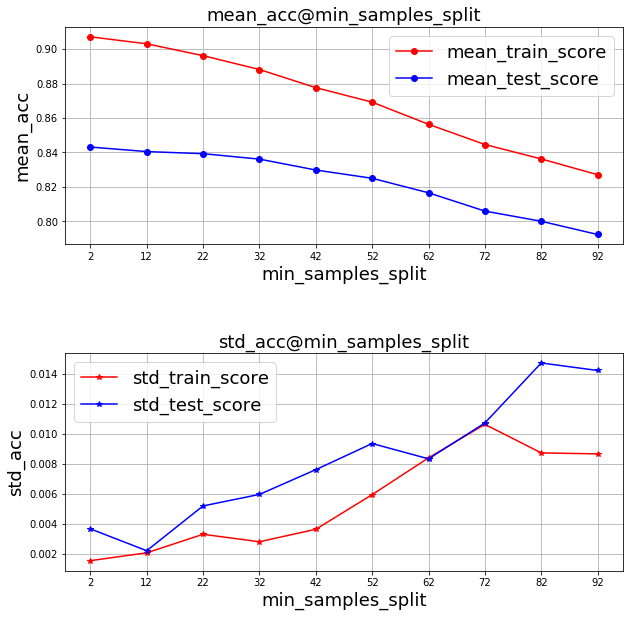

In [343]:
plot_acc_4_grid(rf_grid_cv, 'min_samples_split')

In [344]:
rf_param = {
    'min_samples_split': np.arange(2,22),
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto'), 
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

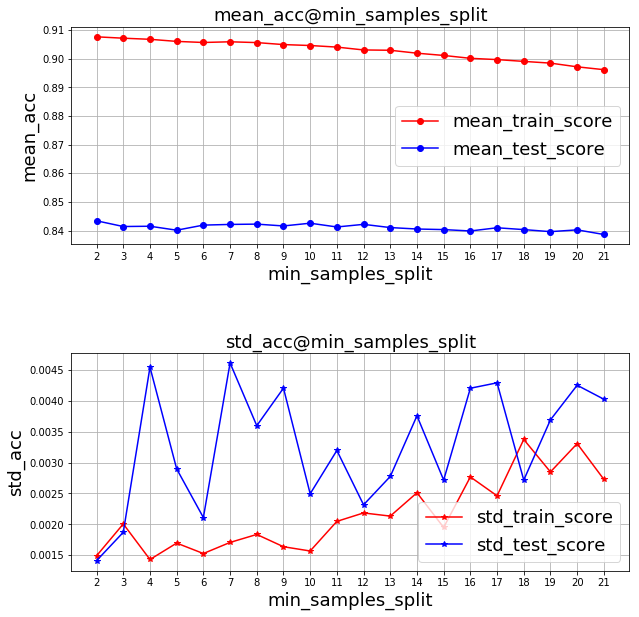

In [345]:
plot_acc_4_grid(rf_grid_cv, 'min_samples_split')

* max_leaf_nodes

In [346]:
rf_param = {
    'max_leaf_nodes': np.arange(2, 1000, 10)
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                                               min_samples_split=2),  
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': array([  2,  12, ..., 982, 992])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

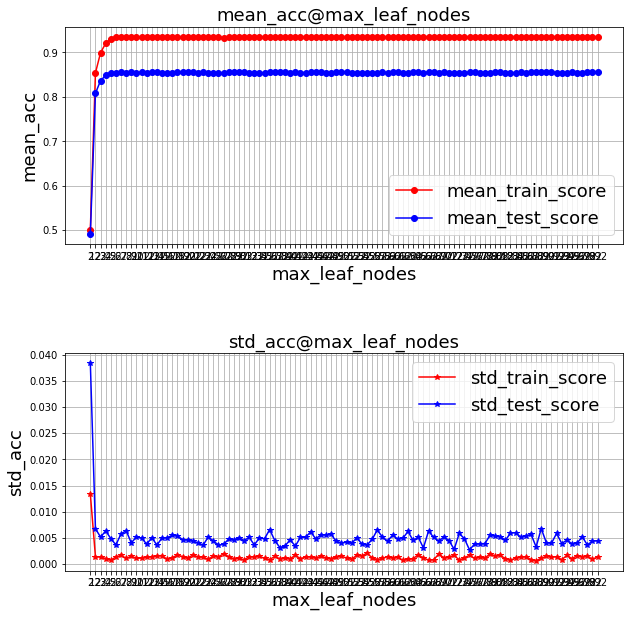

In [347]:
plot_acc_4_grid(rf_grid_cv, 'max_leaf_nodes')

In [348]:
rf_param = {
    'max_leaf_nodes': np.arange(2, 200, 10)
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                                               min_samples_split=2),  
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
       132, 142, 152, 162, 172, 182, 192])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

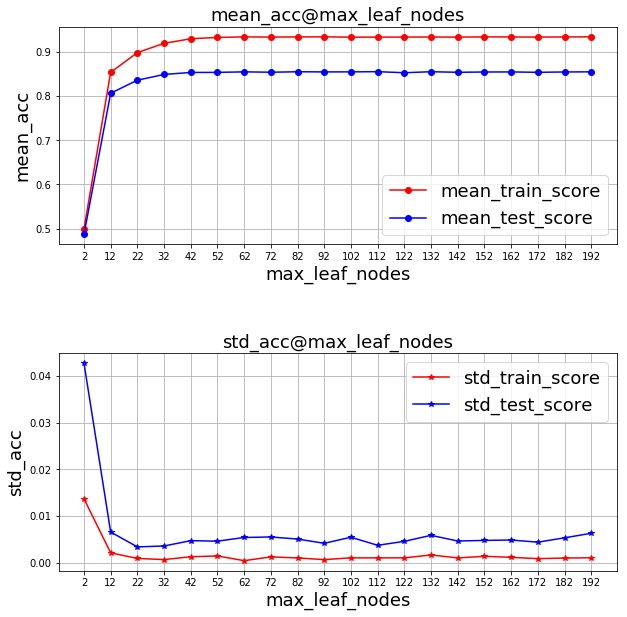

In [349]:
plot_acc_4_grid(rf_grid_cv, 'max_leaf_nodes')

* min_weight_fraction_leaf

In [367]:
rf_param = {
    'min_weight_fraction_leaf': np.linspace(0, 0.5, 10)
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                                               min_samples_split=2, max_leaf_nodes=22 ), 
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=22,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_weight_fraction_leaf': array([0.     , 0.05556, 0.11111, 0.16667, 0.22222, 0.27778, 0.33333,
       0.38889, 0.44444, 0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

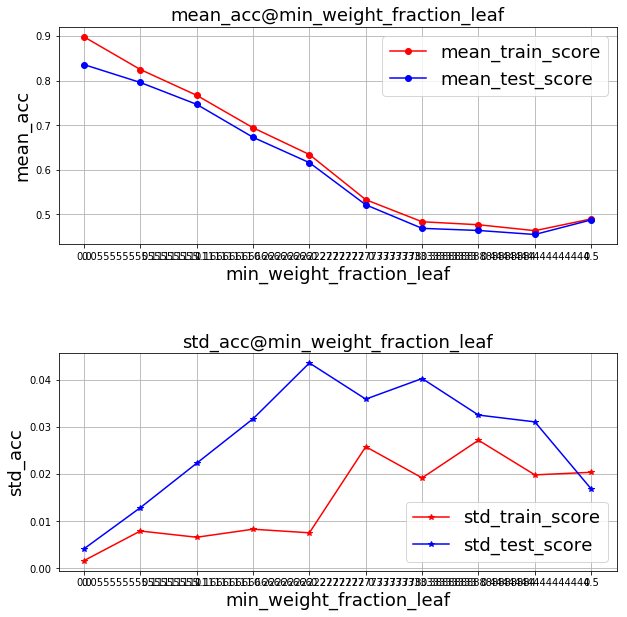

In [368]:
plot_acc_4_grid(rf_grid_cv, 'min_weight_fraction_leaf')

* min_samples_leaf

In [369]:
rf_param = {
    'min_samples_leaf': np.arange(1, 100, 10)
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                                               min_samples_split=2, max_leaf_nodes=22, min_weight_fraction_leaf=0 ), 
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=22,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

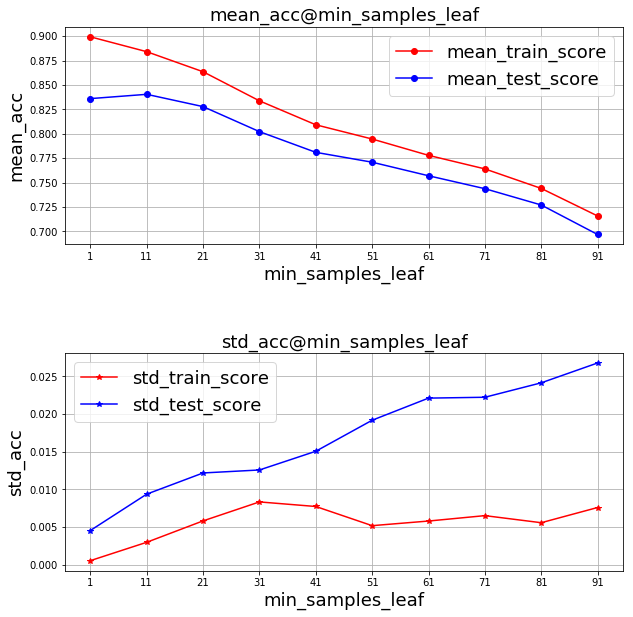

In [370]:
plot_acc_4_grid(rf_grid_cv, 'min_samples_leaf')

* bootstrap

In [371]:
rf_param = {
    'bootstrap': [True, False]
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                           min_samples_split=2, max_leaf_nodes=22, min_weight_fraction_leaf=0,
                          min_samples_leaf=1),
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=22,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=True)

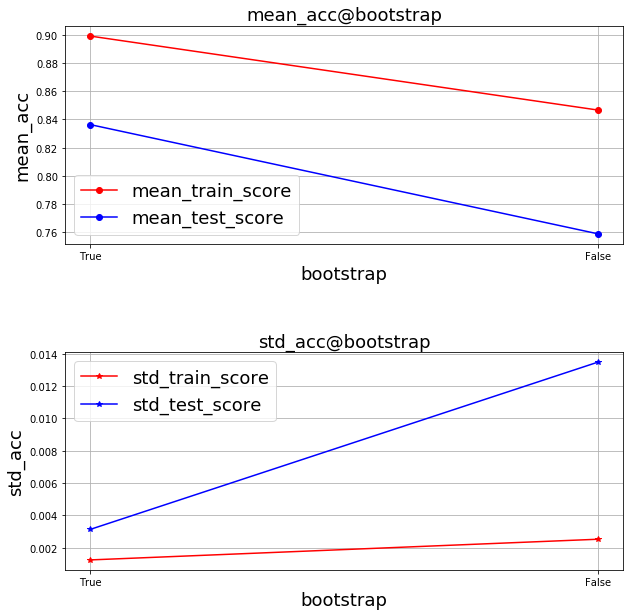

In [372]:
plot_acc_4_grid(rf_grid_cv, 'bootstrap')

* criterion

In [373]:
rf_param = {
    'criterion': ['mse', 'mae']
}
rf_grid_cv = GridSearchCV(RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                           min_samples_split=2, max_leaf_nodes=22, min_weight_fraction_leaf=0,
                          min_samples_leaf=1, bootstrap=True),
                          param_grid=rf_param, cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   59.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   59.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=22,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0, n_estimators=160, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['mse', 'mae']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=True)

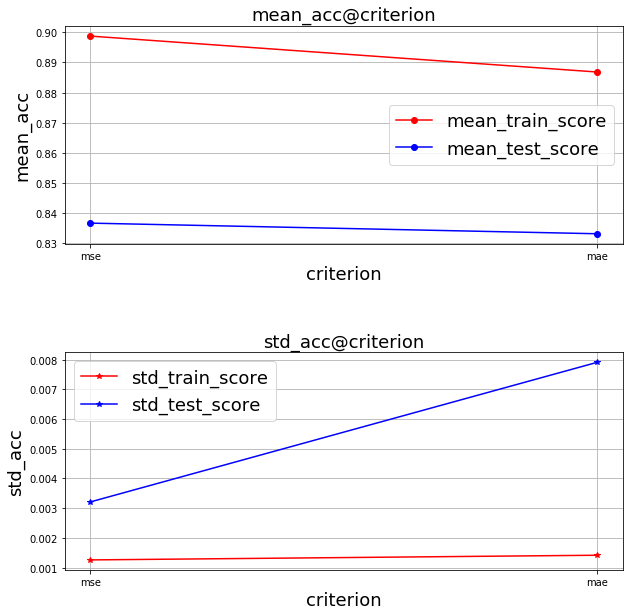

In [374]:
plot_acc_4_grid(rf_grid_cv, 'criterion')

* RandomForestRegressor

In [375]:
rf = RandomForestRegressor(n_estimators=160, max_depth=5, max_features='auto',
                           min_samples_split=2, max_leaf_nodes=22, min_weight_fraction_leaf=0,
                          min_samples_leaf=1, bootstrap=True)

In [376]:
rf_pred = cross_val_predict(rf, x_train, y_train, 
                                 verbose=True, n_jobs=-1, cv=3)
mse = mean_squared_error(y_train, rf_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished


0.16115609724602975

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.1s finished


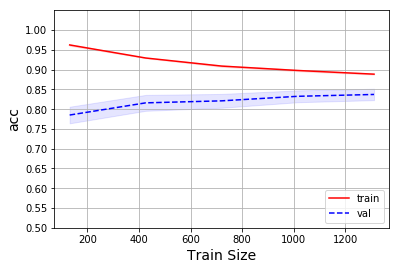

In [377]:
plot_learning_curve(rf, x_train, y_train)

## GBDT

* n_estimators

In [378]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbdt_param = {
    'n_estimators': np.arange(1, 3000, 100),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

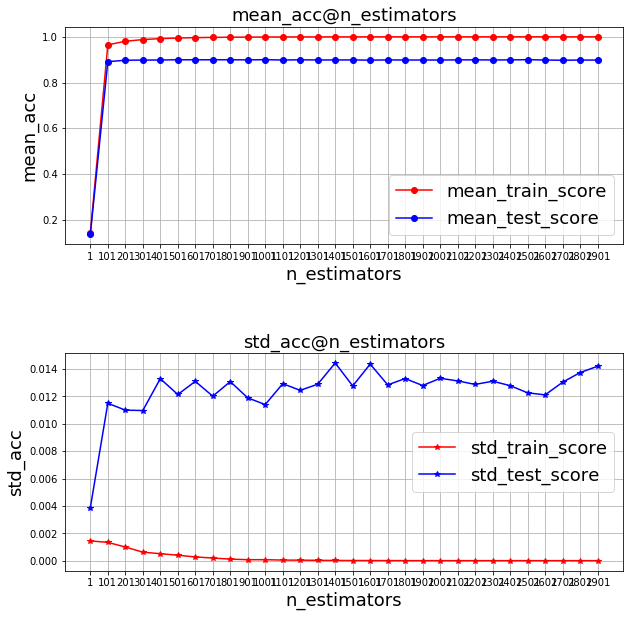

In [379]:
plot_acc_4_grid(gbdt_grid_cv, 'n_estimators')

In [381]:
gbdt_param = {
    'n_estimators': np.arange(1, 200),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 199 candidates, totalling 597 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 597 out of 597 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([  1,   2, ..., 198, 199])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

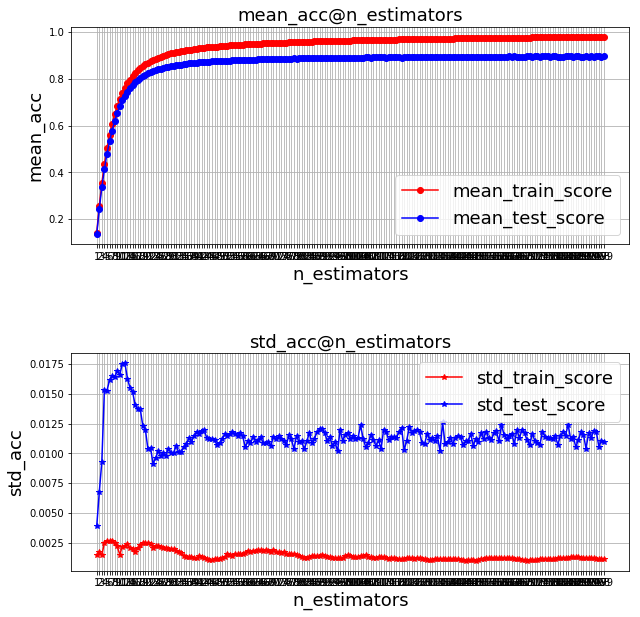

In [382]:
plot_acc_4_grid(gbdt_grid_cv, 'n_estimators')

In [387]:
gbdt_param = {
    'n_estimators': np.arange(10, 70),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   25.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

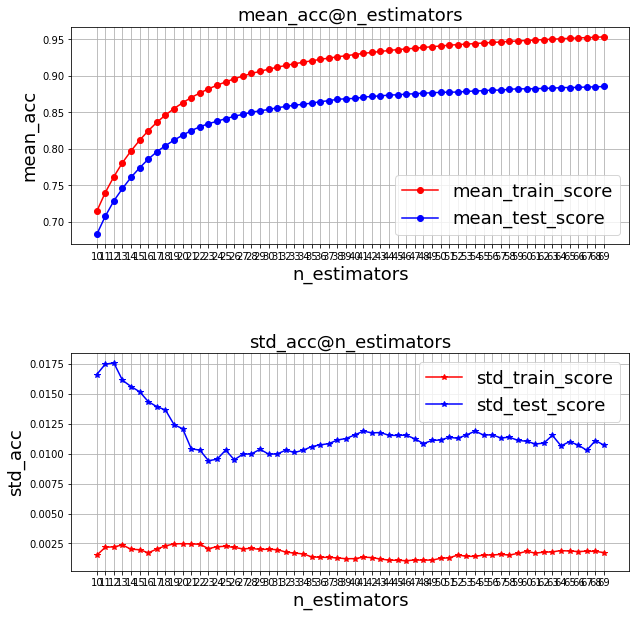

In [388]:
plot_acc_4_grid(gbdt_grid_cv, 'n_estimators')

* max_depth

In [389]:
gbdt_param = {
    'max_depth': np.arange(1, 100),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

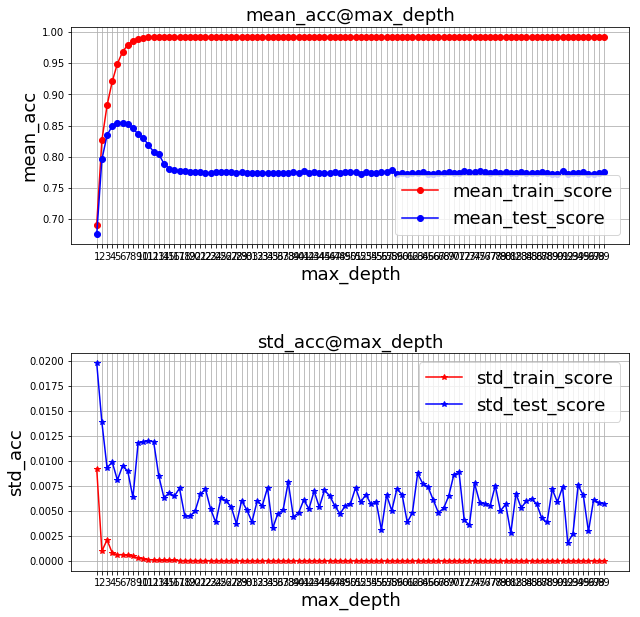

In [390]:
plot_acc_4_grid(gbdt_grid_cv, 'max_depth')

* max_features

In [391]:
gbdt_param = {
    'max_features': np.arange(1, 345, 10),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   26.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

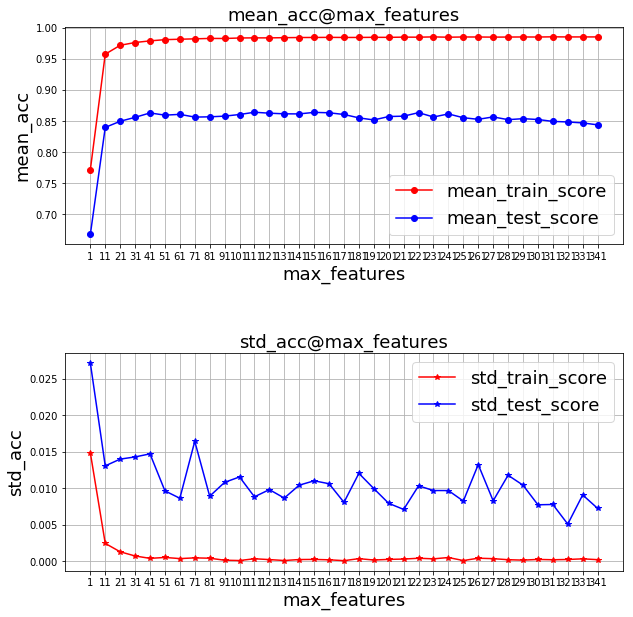

In [392]:
plot_acc_4_grid(gbdt_grid_cv, 'max_features')

In [393]:
gbdt_param = {
    'max_features': np.arange(61, 81),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

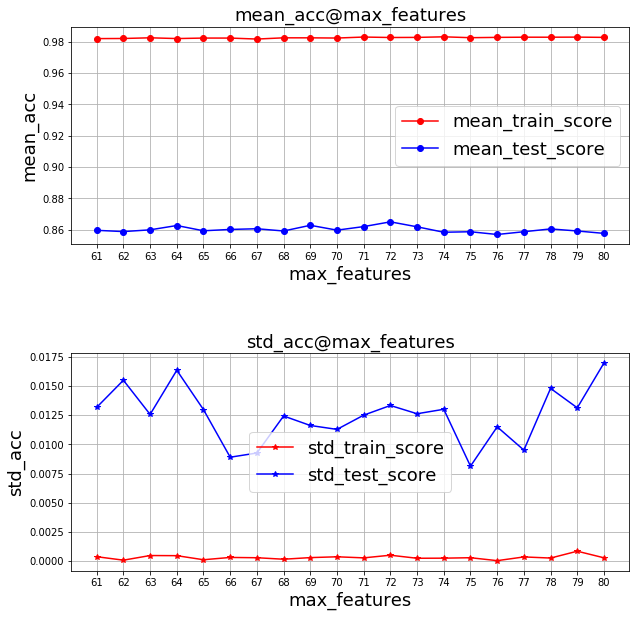

In [394]:
plot_acc_4_grid(gbdt_grid_cv, 'max_features')

* min_samples_split

In [395]:
gbdt_param = {
    'min_samples_split': np.arange(2,100),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto'), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': array([ 2,  3, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

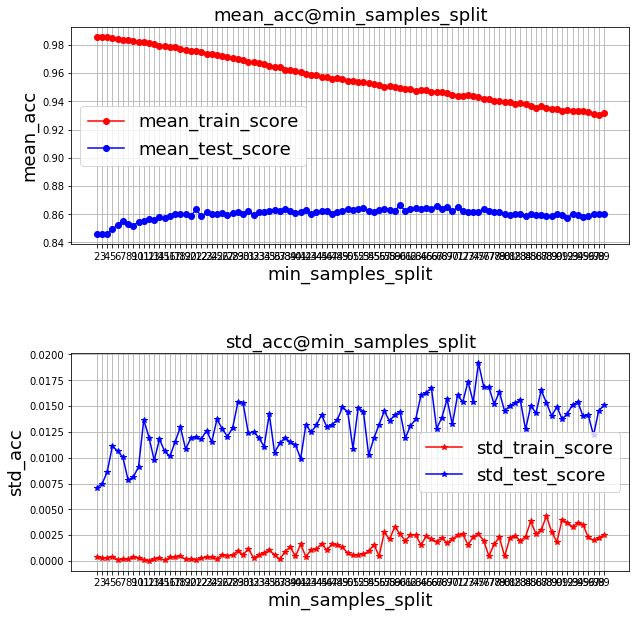

In [396]:
plot_acc_4_grid(gbdt_grid_cv, 'min_samples_split')

* max_leaf_nodes

In [400]:
gbdt_param = {
    'max_leaf_nodes': np.arange(2,1000, 10),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': array([  2,  12, ..., 982, 992])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

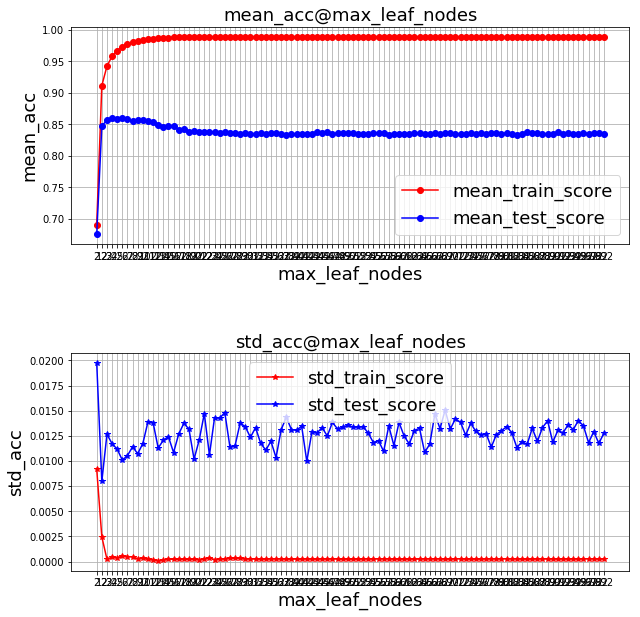

In [401]:
plot_acc_4_grid(gbdt_grid_cv, 'max_leaf_nodes')

In [402]:
gbdt_param = {
    'max_leaf_nodes': np.arange(2,100),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': array([ 2,  3, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

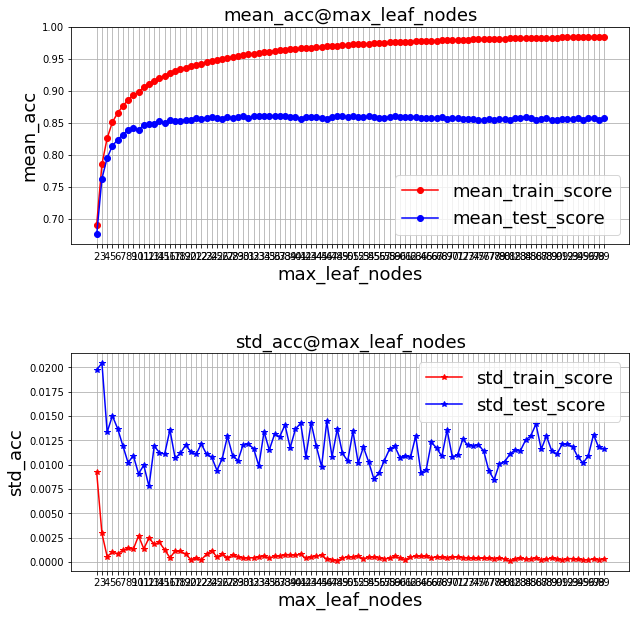

In [403]:
plot_acc_4_grid(gbdt_grid_cv, 'max_leaf_nodes')

* min_weight_fraction_leaf

In [404]:
gbdt_param = {
    'min_weight_fraction_leaf': np.linspace(0,0.5, 10),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2, max_leaf_nodes=12), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=12,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sampl...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_weight_fraction_leaf': array([0.     , 0.05556, 0.11111, 0.16667, 0.22222, 0.27778, 0.33333,
       0.38889, 0.44444, 0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

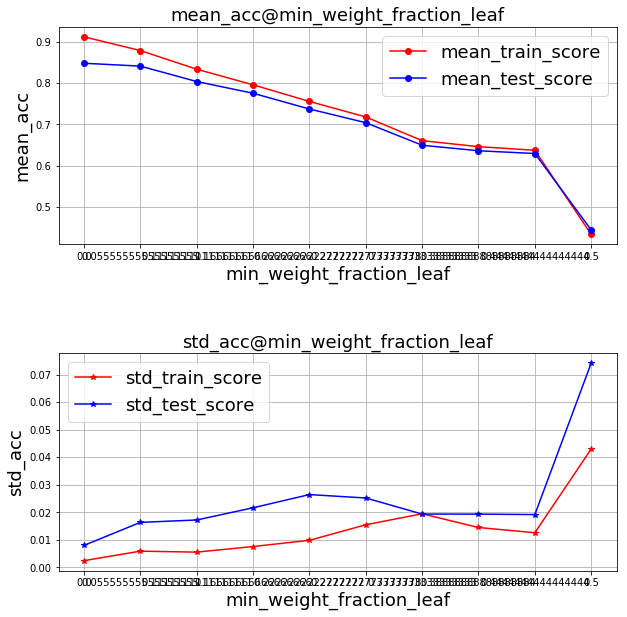

In [405]:
plot_acc_4_grid(gbdt_grid_cv, 'min_weight_fraction_leaf')

* min_samples_leaf

In [408]:
gbdt_param = {
    'min_samples_leaf': np.arange(1,100, 10),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2, max_leaf_nodes=12, min_weight_fraction_leaf=0), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=12,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sampl...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

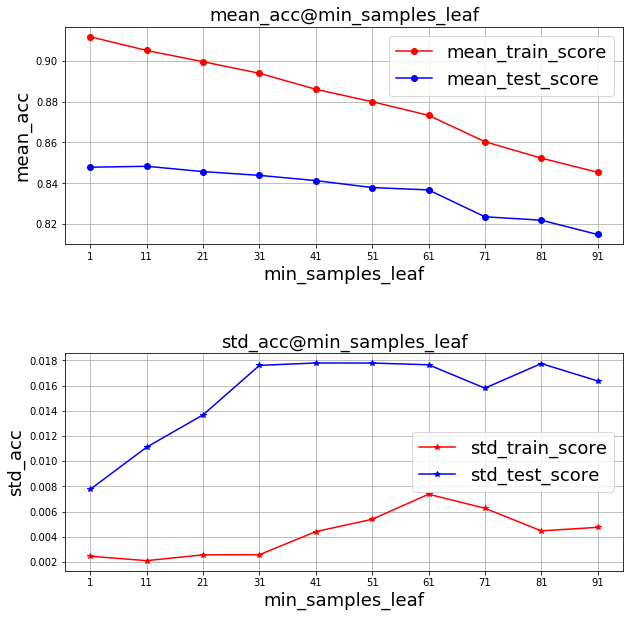

In [409]:
plot_acc_4_grid(gbdt_grid_cv, 'min_samples_leaf')

* subsample

In [414]:
gbdt_param = {
    'subsample': np.linspace(1e-7, 1, 100),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2, max_leaf_nodes=12, min_weight_fraction_leaf=0,
                                                     min_samples_leaf=1), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=12,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sampl...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'subsample': array([1.00000e-07, 1.01011e-02, ..., 9.89899e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

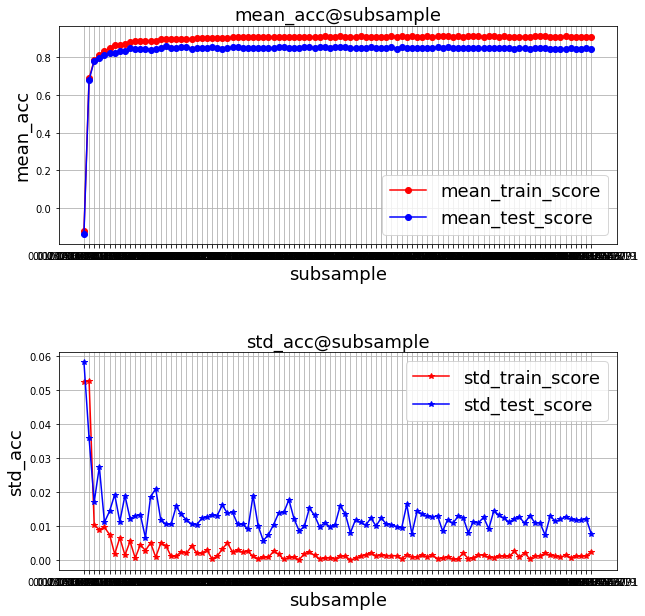

In [415]:
plot_acc_4_grid(gbdt_grid_cv, 'subsample')

In [416]:
gbdt_param = {
    'subsample': np.linspace(1e-7,2.22222e-01, 100),
}
gbdt_grid_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2, max_leaf_nodes=12, min_weight_fraction_leaf=0,
                                                     min_samples_leaf=1), 
                            param_grid=gbdt_param, verbose=True, cv=3, n_jobs=-1)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='auto', max_leaf_nodes=12,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sampl...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'subsample': array([1.00000e-07, 2.24477e-03, ..., 2.19977e-01, 2.22222e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

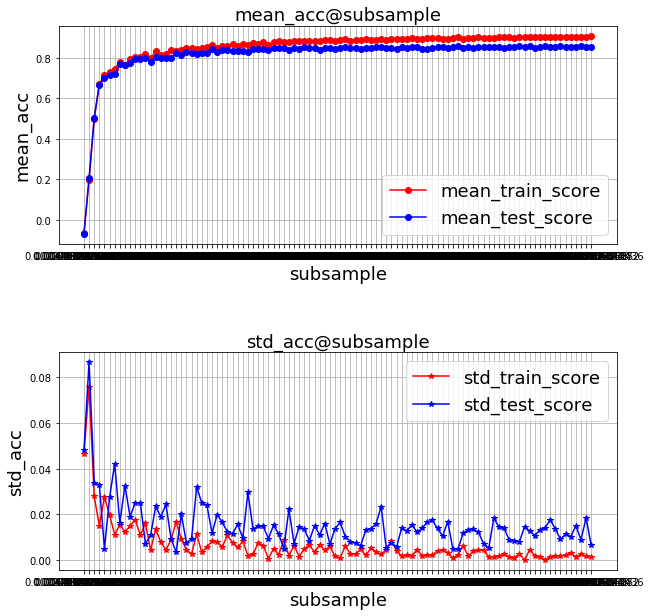

In [425]:
plot_acc_4_grid(gbdt_grid_cv, 'subsample')

In [426]:
gbdt = GradientBoostingRegressor(n_estimators=23, max_depth=8, max_features='auto', 
                                                      min_samples_split=2, max_leaf_nodes=12, min_weight_fraction_leaf=0,
                                                     min_samples_leaf=1, subsample=1)

In [427]:
gbdt_pred = cross_val_predict(gbdt, x_train, y_train)
mse = mean_squared_error(y_train, gbdt_pred)
np.sqrt(mse)

0.1558966244053635

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.1s finished


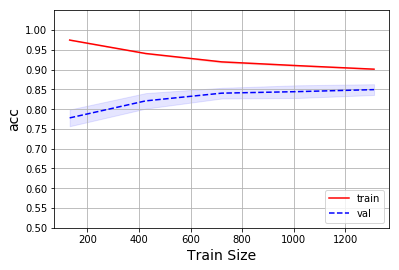

In [428]:
plot_learning_curve(gbdt, x_train, y_train)

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# gbdt_param = {
#     'n_estimators': np.arange(1000, 5000, 100),
#     'max_depth': np.arange(2, 10),
#     'subsample': np.linspace(0.1, 1, 20),
#     'max_features':['auto', 'sqrt', 'log2']
# }

# gbdt_grid_cv = RandomizedSearchCV(GradientBoostingRegressor(n_estimators=100), param_distributions=gbdt_param, n_jobs=-1,
#                                  verbose=True, random_state=42, cv=3)
# gbdt_grid_cv.fit(x_train, y_train)
gbdt = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3900,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.5736842105263158, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
gbdt.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3900,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.5736842105263158, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
# gbdt_grid_cv.best_estimator_

In [40]:
# gbdt_grid_cv.best_score_

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
# gbdt = gbdt_grid_cv.best_estimator_
gbdt_pred = cross_val_predict(gbdt, x_train, y_train,
                             verbose=True, n_jobs=-1, cv=5)
mse = mean_squared_error(y_train, gbdt_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.5s finished


0.12245307114524771

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished


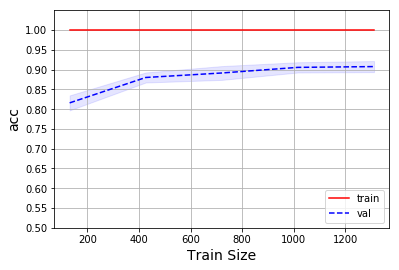

In [42]:
plot_learning_curve(gbdt, x_train, y_train)

## XGBoost

* n_estimators

In [429]:
from xgboost import XGBRegressor
xg_param = {
    'n_estimators': np.arange(100, 1000,100),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree'), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

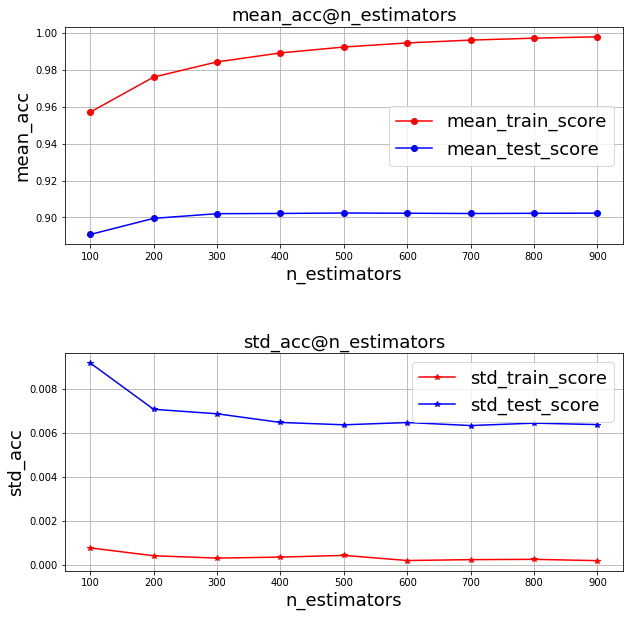

In [430]:
plot_acc_4_grid(xg_grid_cv, 'n_estimators')

In [431]:
xg_param = {
    'n_estimators': np.arange(100, 2000, 100),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree'), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  7.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

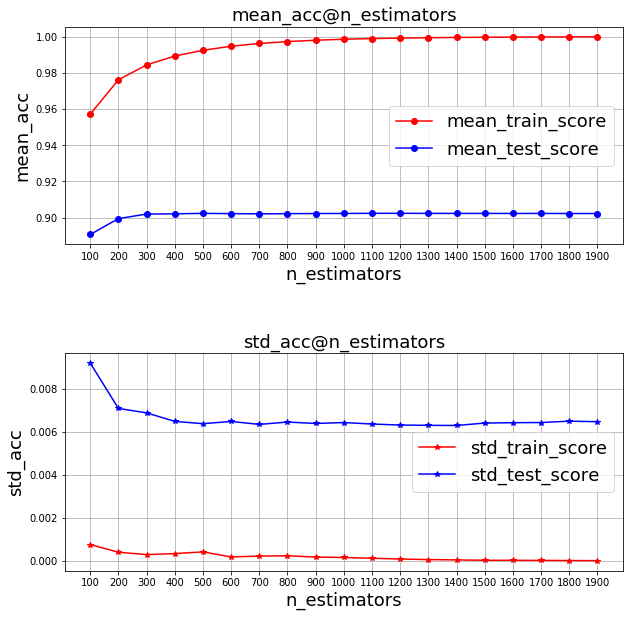

In [432]:
plot_acc_4_grid(xg_grid_cv, 'n_estimators')

In [439]:
xg_param = {
    'n_estimators': np.arange(450, 600, 10),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree'), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570,
       580, 590])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

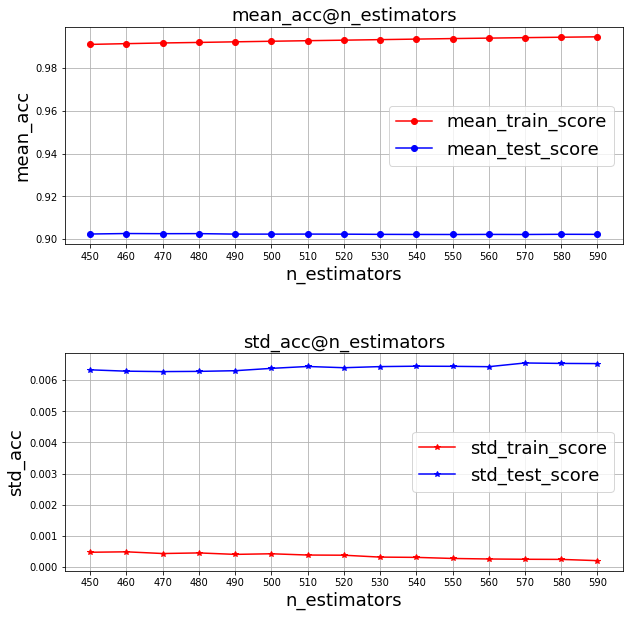

In [440]:
plot_acc_4_grid(xg_grid_cv, 'n_estimators')

In [441]:
xg_param = {
    'n_estimators': np.arange(460, 480),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree'), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472,
       473, 474, 475, 476, 477, 478, 479])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

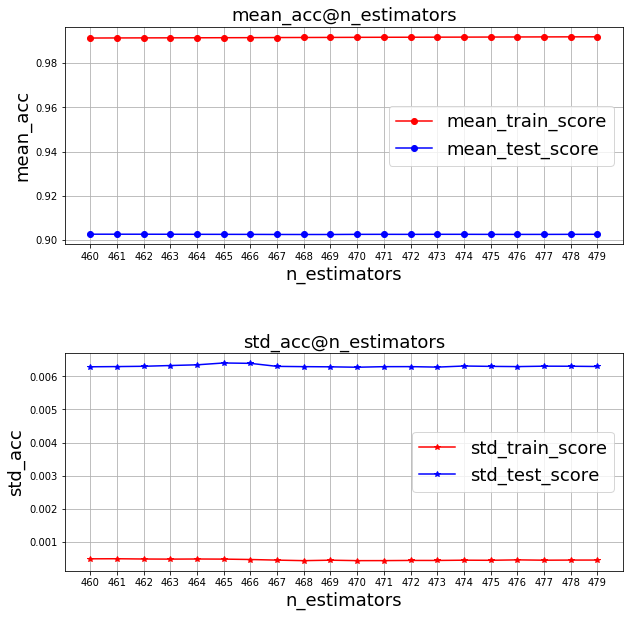

In [442]:
plot_acc_4_grid(xg_grid_cv, 'n_estimators')

In [445]:
xg_grid_cv.cv_results_

{'mean_fit_time': array([16.77087108, 16.56628791, 16.53286195, 16.48052835, 18.50080125,
        17.88966179, 17.50711584, 16.84727049, 16.20652898, 17.28450465,
        17.48412037, 17.0510006 , 16.60813022, 18.08475184, 19.80619462,
        21.77392968, 18.87454247, 18.52810876, 18.63795424, 18.59706275]),
 'std_fit_time': array([0.06452758, 0.31981148, 0.13711394, 0.14862619, 0.19553549,
        0.75645545, 0.38300823, 0.39934476, 0.20871311, 0.51859026,
        0.53054543, 0.11082421, 0.30885861, 0.70884986, 1.37727965,
        0.08492364, 0.06974826, 0.11424264, 0.5682274 , 0.48720384]),
 'mean_score_time': array([0.01766666, 0.02504349, 0.01392539, 0.01975203, 0.01903812,
        0.01699042, 0.02690125, 0.01732858, 0.01528366, 0.01802301,
        0.01720095, 0.01680136, 0.02672577, 0.0214026 , 0.02584465,
        0.01834901, 0.02193697, 0.02316133, 0.0175554 , 0.01474897]),
 'std_score_time': array([0.00455945, 0.01269679, 0.00109658, 0.00328442, 0.00749728,
        0.00206802, 

* max_depth

In [446]:
xg_param = {
    'max_depth': np.arange(1, 100),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed: 36.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

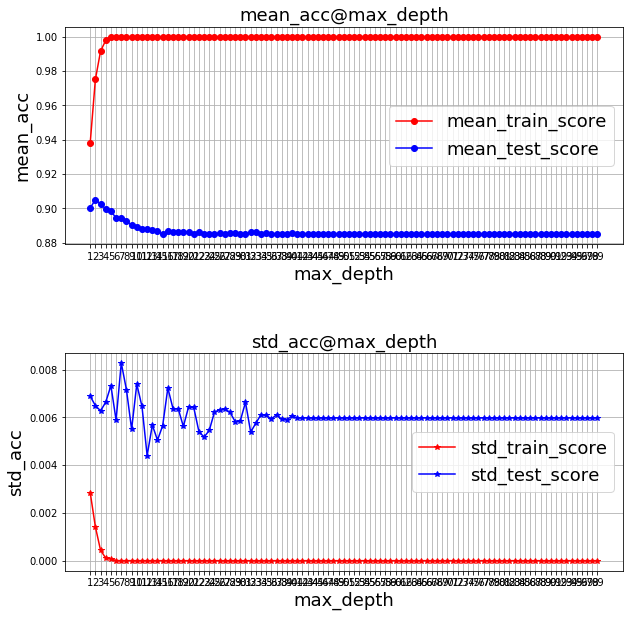

In [447]:
plot_acc_4_grid(xg_grid_cv, 'max_depth')

* reg_lambda

In [448]:
xg_param = {
    'reg_lambda': np.linspace(0, 1),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_lambda': array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245,
       0.14286, 0.16327, 0.18367, 0.20408, 0.22449, 0.2449 , 0.26531,
       0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816,
       0.42857, 0.44898, 0.46939, 0.4898 , 0.5102 , 0.53061, 0.5...33, 0.83673,
       0.85714, 0.87755, 0.89796, 0.91837, 0.93878, 0.95918, 0.97959,
       1.     ])},
       pre_dispatch

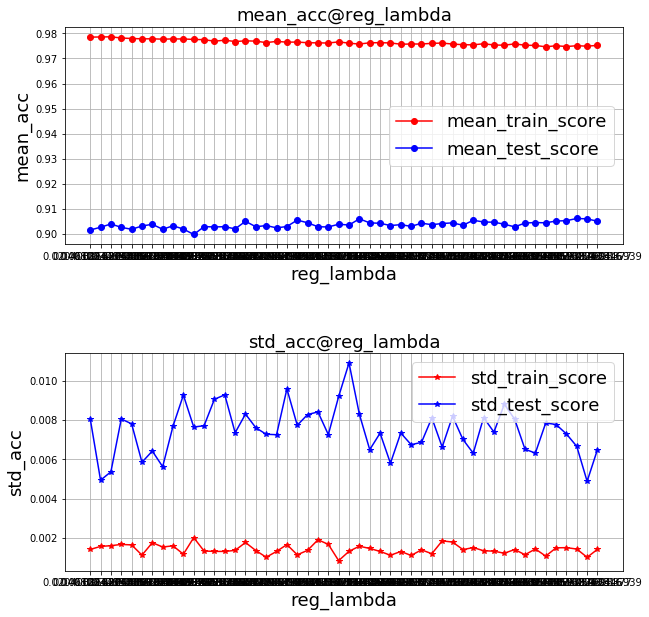

In [449]:
plot_acc_4_grid(xg_grid_cv, 'reg_lambda')

* reg_alpha

In [450]:
xg_param = {
    'reg_alpha': np.linspace(0, 1),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=1), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 11.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_alpha': array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245,
       0.14286, 0.16327, 0.18367, 0.20408, 0.22449, 0.2449 , 0.26531,
       0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816,
       0.42857, 0.44898, 0.46939, 0.4898 , 0.5102 , 0.53061, 0.55...33, 0.83673,
       0.85714, 0.87755, 0.89796, 0.91837, 0.93878, 0.95918, 0.97959,
       1.     ])},
       pre_dispatch

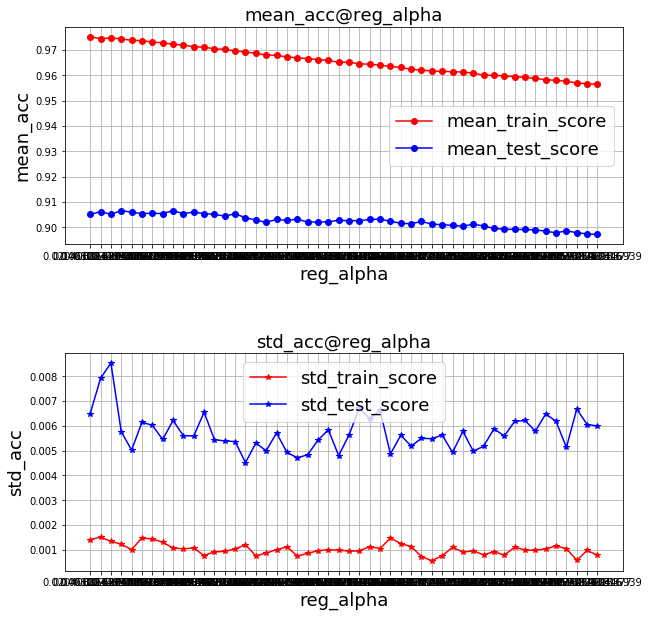

In [451]:
plot_acc_4_grid(xg_grid_cv, 'reg_alpha')

* colsample_bylevel

In [458]:
xg_param = {
    'colsample_bylevel': np.linspace(0, 1),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=0, reg_alpha=0.08163), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.08163, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'colsample_bylevel': array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245,
       0.14286, 0.16327, 0.18367, 0.20408, 0.22449, 0.2449 , 0.26531,
       0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816,
       0.42857, 0.44898, 0.46939, 0.4898 , 0.5102 , 0.530...33, 0.83673,
       0.85714, 0.87755, 0.89796, 0.91837, 0.93878, 0.95918, 0.97959,
       1.     ])},
       pre_di

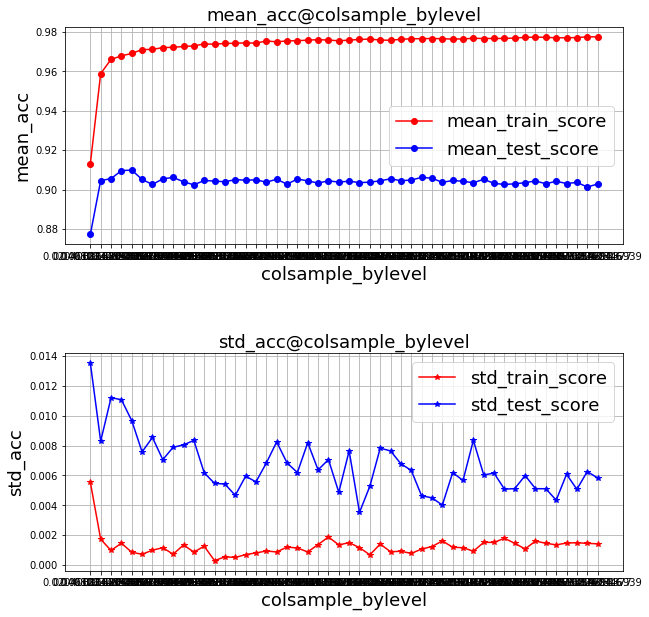

In [459]:
plot_acc_4_grid(xg_grid_cv, 'colsample_bylevel')

* colsample_bynode

In [460]:
xg_param = {
    'colsample_bynode': np.linspace(0, 1),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=0, reg_alpha=0.08163, colsample_bylevel=0.06122), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.06122,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.08163, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'colsample_bynode': array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245,
       0.14286, 0.16327, 0.18367, 0.20408, 0.22449, 0.2449 , 0.26531,
       0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816,
       0.42857, 0.44898, 0.46939, 0.4898 , 0.5102 , 0.5306...33, 0.83673,
       0.85714, 0.87755, 0.89796, 0.91837, 0.93878, 0.95918, 0.97959,
       1.     ])},
       

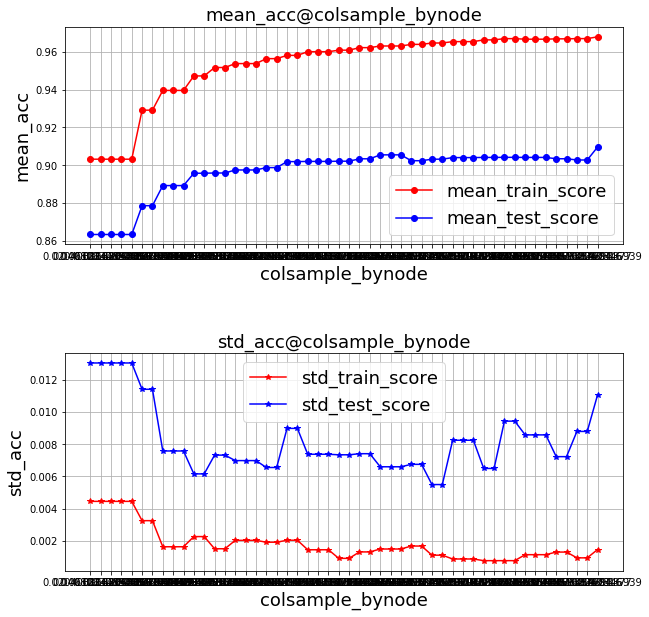

In [461]:
plot_acc_4_grid(xg_grid_cv, 'colsample_bynode')

In [462]:
xg_param = {
    'colsample_bynode': np.linspace(0.91837, 1),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=0, reg_alpha=0.08163, colsample_bylevel=0.06122), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.06122,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.08163, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'colsample_bynode': array([0.91837, 0.92004, 0.9217 , 0.92337, 0.92503, 0.9267 , 0.92837,
       0.93003, 0.9317 , 0.93336, 0.93503, 0.9367 , 0.93836, 0.94003,
       0.94169, 0.94336, 0.94502, 0.94669, 0.94836, 0.95002, 0.95169,
       0.95335, 0.95502, 0.95669, 0.95835, 0.96002, 0.9616...01, 0.98667,
       0.98834, 0.99   , 0.99167, 0.99334, 0.995  , 0.99667, 0.99833,
       1.     ])},
       

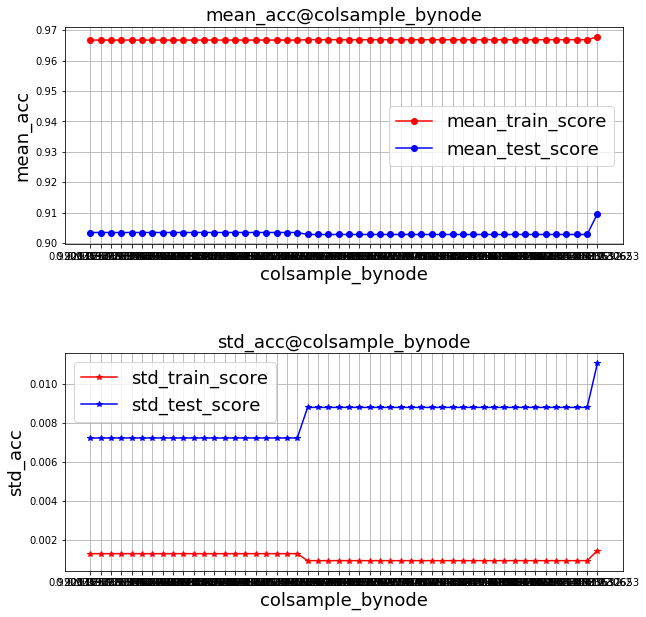

In [463]:
plot_acc_4_grid(xg_grid_cv, 'colsample_bynode')

* colsample_bytree

In [464]:
xg_param = {
    'colsample_bytree': np.linspace(0, 1),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=0, reg_alpha=0.08163, colsample_bylevel=0.06122,
                                      colsample_bynode=0), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.06122,
       colsample_bynode=0, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.08163, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'colsample_bytree': array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245,
       0.14286, 0.16327, 0.18367, 0.20408, 0.22449, 0.2449 , 0.26531,
       0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816,
       0.42857, 0.44898, 0.46939, 0.4898 , 0.5102 , 0.5306...33, 0.83673,
       0.85714, 0.87755, 0.89796, 0.91837, 0.93878, 0.95918, 0.97959,
       1.     ])},
       

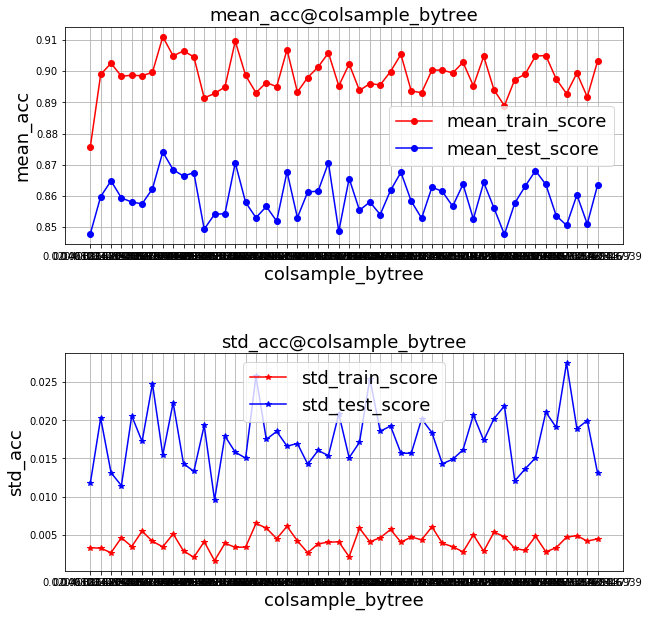

In [465]:
plot_acc_4_grid(xg_grid_cv, 'colsample_bytree')

* min_child_weight

In [466]:
xg_param = {
    'min_child_weight': np.arange(1, 100),
}
xg_grid_cv = GridSearchCV(XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=0, reg_alpha=0.08163, colsample_bylevel=0.06122,
                                      colsample_bynode=0, colsample_bytree=1), 
                            param_grid=xg_param, verbose=True, cv=3, n_jobs=-1)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:  8.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.06122,
       colsample_bynode=0, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=470,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.08163, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_child_weight': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

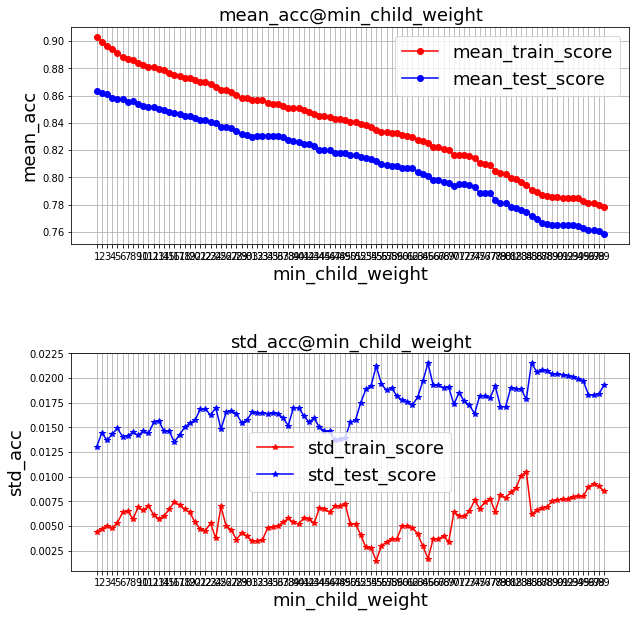

In [467]:
plot_acc_4_grid(xg_grid_cv, 'min_child_weight')

In [12]:
xg = XGBRegressor(objective='reg:squarederror', booster='gbtree', n_estimators=470, 
                                       max_depth=2, reg_lambda=0, reg_alpha=0.08163, colsample_bylevel=0.06122,
                                      colsample_bynode=0, colsample_bytree=1, min_child_weight=1)
xg_pred = cross_val_predict(xg, x_train, y_train,
                             verbose=True, n_jobs=-1, cv=5)
mse = mean_squared_error(y_train, xg_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished


0.1528000589940058

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.8s finished


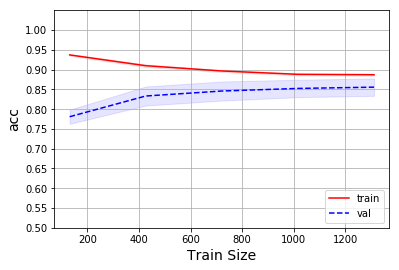

In [13]:
plot_learning_curve(xg, x_train, y_train)

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
# xg = XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
# xg_pipeline = Pipeline([
# #     ('kpca',KernelPCA()),
#     ('xg', xg)
# ])
# xg_param = {
# #     'kpca__gamma': np.linspace(0.01, 0.10, 10),
# #     'kpca__kernel': ['rbf', 'linear', 'poly'],
#     'xg__n_estimators': np.arange(3000, 5000, 100),
#     'xg__max_depth': np.arange(2, 10) ,
#     'xg__gamma': np.linspace(0, 0.1),
#     'xg__min_child_weight': np.linspace(1, 5),
#     'xg__reg_lambda': np.linspace(0, 1),
#     'xg__reg_alpha': np.linspace(0, 1),
#     'xg__colsample_bytree': np.linspace(0, 1),
#     'xg__subsample': np.linspace(0, 1),
#     'xg__learning_rate': np.linspace(0, 0.1)
# }
# xg_grid_cv = RandomizedSearchCV(xg_pipeline, param_distributions=xg_param, cv=3,
#                                n_jobs=-1, verbose=True)
# xg_grid_cv.fit(x_train, y_train)
xg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.673469387755102,
         gamma=0.030612244897959186, importance_type='gain',
         learning_rate=0.030612244897959186, max_delta_step=0, max_depth=8,
         min_child_weight=1.2448979591836735, missing=None,
         n_estimators=3600, n_jobs=-1, nthread=None, objective='reg:linear',
         random_state=42, reg_alpha=0.5714285714285714,
         reg_lambda=0.12244897959183673, scale_pos_weight=1, seed=None,
         silent=True, subsample=0.6938775510204082, verbosity=1)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.673469387755102,
       gamma=0.030612244897959186, importance_type='gain',
       learning_rate=0.030612244897959186, max_delta_step=0, max_depth=8,
       min_child_weight=1.2448979591836735, missing=None,
       n_estimators=3600, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0.5714285714285714,
       reg_lambda=0.12244897959183673, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6938775510204082, verbosity=1)

In [44]:
#  xg_grid_cv.best_estimator_

In [45]:
# xg_grid_cv.best_score_

In [66]:
xg_pred = cross_val_predict(xg, x_train, y_train, 
                            cv=3, verbose=True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished


In [67]:
mse = mean_squared_error(y_train, xg_pred)
np.sqrt(mse)

0.12419601284479917

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.1min finished


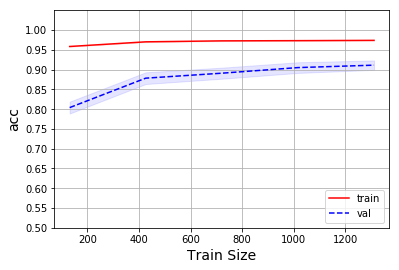

In [68]:
plot_learning_curve(xg, x_train, y_train)

## stack 

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold

class StackModel(BaseEstimator, TransformerMixin, RegressorMixin):
    def __init__(self, base_models, final_model, n_folds=5):
        self.base_models = base_models
        self.final_model = final_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        self.base_models_ = [list() for i in self.base_models]
        self.final_model_ = clone(self.final_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        out_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_predictions[holdout_index, i] = y_pred
        
        self.final_model_.fit(out_predictions, y)
        return self
                
    def predict(self, X):
        final_feature = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])
        return self.final_model_.predict(final_feature)
        

In [15]:
from sklearn.linear_model import  Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

ridge = KernelRidge(degree=2, alpha=0.05, kernel='polynomial')
lasso = Lasso(alpha=0.0005)
en = ElasticNet(max_iter=5000, selection='random')
gbdt = GradientBoostingRegressor(n_estimators=49, max_depth=5, max_features='auto', 
                                                      min_samples_split=2, max_leaf_nodes=7, min_weight_fraction_leaf=0,
                                                     min_samples_leaf=1, subsample=1)

stack_models = StackModel(base_models=(ridge, gbdt, en), final_model=lasso)
stack_models.fit(x_train, y_train)

StackModel(base_models=(KernelRidge(alpha=0.05, coef0=1, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None), GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=7,
  ...False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)),
      final_model=Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
      n_folds=5)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
stack_pred = stack_models.predict(x_train)
mse = mean_squared_error(stack_pred, y_train)
np.sqrt(mse)

0.08064411070696224

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


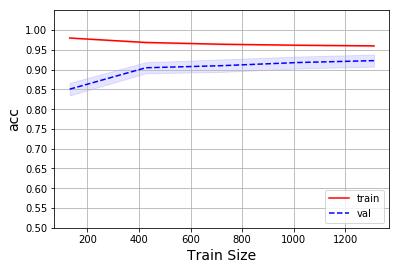

In [17]:
plot_learning_curve(stack_models, x_train, y_train)

## LightGBM

In [41]:
from  lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
lgb_params = {
    'n_estimators': np.arange(500, 3000, 100),
    'num_leaves': np.arange(3, 100),
    'learning_rate': np.linspace(1e-3, 0.1),
    'max_bin': np.arange(10, 100),
    'bagging_fraction': np.linspace(1e-3, 1),
    'bagging_freq': np.arange(1, 10),
    'feature_fraction': np.linspace(1e-3, 1),
    'min_data_in_leaf': np.arange(1, 20),
    'min_sum_hessian_in_leaf': np.linspace(1e-3, 20),
    'max_depth': np.arange(10, 20)
}
lgb_grid_cv = RandomizedSearchCV(LGBMRegressor(objective='regression', feature_fraction_seed=42, bagging_seed=42), 
                                param_distributions=lgb_params, cv=5,
                                n_jobs=-1, verbose=True)
lgb_grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LGBMRegressor(bagging_seed=42, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction_seed=42,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500,
       1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600,
       2700, 2800, 2900]), 'num_leaves': array([ 3,  4, ..., 98, 99]), 'learning_rate': array([0.001  , 0.00302, 0.00...91837e+01, 1.95919e+01, 2.00000e+01]), 'max_depth': array([10, 11, 12, 

In [42]:
lgb_grid_cv.best_score_

0.9038911706779178

In [43]:
lgb_grid_cv.best_params_

{'num_leaves': 3,
 'n_estimators': 2300,
 'min_sum_hessian_in_leaf': 2.858,
 'min_data_in_leaf': 14,
 'max_depth': 13,
 'max_bin': 27,
 'learning_rate': 0.011102040816326531,
 'feature_fraction': 1.0,
 'bagging_freq': 5,
 'bagging_fraction': 0.775734693877551}

In [44]:
lgb_pred = cross_val_predict(lgb_grid_cv.best_estimator_, x_train, y_train, 
                  cv=3, n_jobs=-1)
mse = mean_squared_error(y_train, lgb_pred)
np.sqrt(mse)

0.12889382465830496

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished


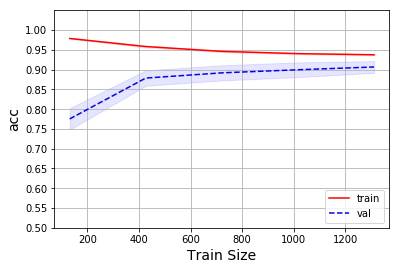

In [45]:
plot_learning_curve(lgb_grid_cv.best_estimator_, x_train, y_train)

## 结合不同预测

In [71]:
ensemble_pred = stack_pred*0.8 + xg_pred*0.2
mse = mean_squared_error(ensemble_pred, y_train)
np.sqrt(mse)

0.07707245327525736

# 预测

In [18]:
test = pd.read_csv('house_price/test.csv')
index = np.array(test[['Id']])[:,0]
test = test.set_index(['Id'])
x_test = full_pipeline.transform(test)

In [22]:
# ridge.fit(x_train, y_train)
stack_models.fit(x_train, y_train)
stack_pre =  stack_models.predict(x_test)
xg.fit(x_train, y_train)
xg_pre = xg.predict(x_test)
ensemble_pred = stack_pre*0.8 + xg_pre*0.2
pred_df = pd.DataFrame({'Id':index,
                       'SalePrice':np.expm1(ensemble_pred)})
pred_df.to_csv('./house_price/prediction.csv', index='')